# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** - установить параметры, влияющие на рыночную стоимость объектов недвижимости.

**Исходные данные** - данные сервиса «Яндекс.Недвижимость» (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).

**Вопросы, интересующие заказчика:**

- Сколько времени занимает продажа квартиры. Когда продажу можно назвать быстрой / долгой
- Какие факторы больше всего влияют на стоимость квартиры
- Какая средняя стоимость квартиры в 10 населённых пунктов с наибольшим числом объявлений
- Какие факторы влияют на стоимость квартиры в центре Санкт-Петербурга. Насколько они отличаются от данных в целом по городу

## Откроем файл с данными, импортируем необходимые библиотеки. 

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

Открываем файл с данными.

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Выведем основную информацию о датафрейме с помощью метода info()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведем первые 20 строчек датафрейма data на экран.

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем последние 20 строчек датафрейма data на экран.

In [5]:
data.tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23680,14,5000000.0,59.00,2019-04-04T00:00:00,3,2.50,5.0,52.0,1,NaN,...,7.00,NaN,Санкт-Петербург,26835.0,11878.0,0.0,NaN,0.0,NaN,NaN
23681,13,5250000.0,43.00,2018-05-11T00:00:00,2,2.50,5.0,29.0,2,NaN,...,6.00,NaN,Санкт-Петербург,28323.0,7262.0,1.0,497.0,2.0,660.0,80.0
23682,11,2350000.0,35.60,2016-06-23T00:00:00,1,2.50,5.0,17.0,4,False,...,8.30,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.5,3,NaN,...,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23686,8,3300000.0,31.00,2017-04-29T00:00:00,1,2.55,9.0,18.0,6,NaN,...,6.50,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23687,6,3200000.0,39.00,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,...,15.00,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0


Используем функцию describe() для создания описательной статистики данных нашей таблицы.

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Сделаем рандомную выборку нашей таблицы.

In [7]:
data.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22219,6,2380000.0,32.0,2016-05-28T00:00:00,1,NaN,5.0,17.5,4,NaN,...,5.5,0.0,Ломоносов,48754.0,52179.0,0.0,NaN,2.0,790.0,420.0


Построим общую гистограмму для всех числовых столбцов таблицы.

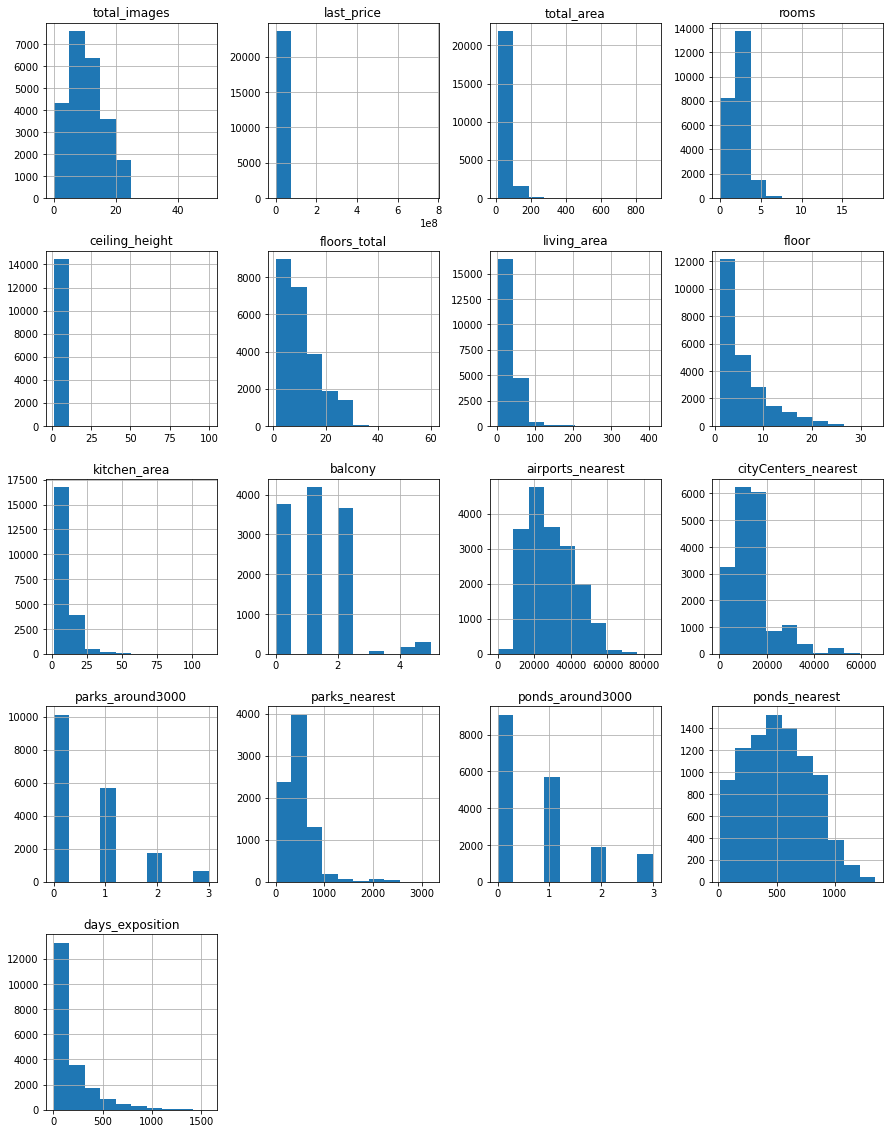

In [8]:
data.hist(figsize=(15, 20));

*По графикам видно, что работы будет очень много...*

## Предобработка данных

***Описание данных***

- 'locality_name'  — название населённого пункта  
- 'total_area_m2'  — общая площадь квартиры в квадратных метрах (м²
- 'living_area_m2' — жилая площадь в квадратных метрах (м²)
- 'kitchen_area_m2' — площадь кухни в квадратных метрах (м²)
- 'ceiling_height_m' — высота потолков (м)
- 'number_of_rooms' — число комнат
- 'number_of_balconies' — число балконов
- 'floor' — этаж
- 'total_floors_in_house' — всего этажей в доме
- 'is_apartment' — апартаменты (булев тип)
- 'is_studio' — квартира-студия (булев тип)
- 'is_open_plan' — свободная планировка (булев тип)
- 'total_images' — число фотографий квартиры в объявлении
- 'last_price' — цена на момент снятия с публикации
- 'first_day_exposition' — дата публикации
- 'days_exposition'— сколько дней было размещено объявление (от публикации до снятия)
- 'city_center_distance_m' — расстояние до центра города (м)
- 'nearest_airport_distance_m' — расстояние до ближайшего аэропорта в метрах (м)
- 'parks_numbers_within_3km' — число парков в радиусе 3 км
- 'nearest_park_distance_m' — расстояние до ближайшего парка (м)
- 'ponds_number_within_3km' — число водоёмов в радиусе 3 км
- 'nearest_pond_distance_m' — расстояние до ближайшего водоёма (м)

### Приведение названия столбцов в относительный порядок и изменение структуры таблицы

Приведём названия столбцов в порядок. Для начала создадим список с нашими названиями.

In [9]:
data.rename(columns = {'total_area':'total_area_m2', 'rooms':'number_of_rooms',\
                      'ceiling_height':'ceiling_height_m','floors_total':'total_floors_in_house',\
                     'living_area':'living_area_m2','studio':'is_studio',\
                     'open_plan':'is_open_plan', 'kitchen_area':'kitchen_area_m2',\
                     'balcony':'number_of_balconies','airports_nearest': 'nearest_airport_distance_m',\
                      'cityCenters_nearest': 'city_center_distance_m',\
                       'parks_around3000':'parks_numbers_within_3km',\
                       'parks_nearest':'nearest_park_distance_m',\
                       'ponds_around3000':'ponds_number_within_3km',\
                       'ponds_nearest': 'nearest_pond_distance_m'}, inplace = True )

Проверим результат.

In [10]:
data.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,locality_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изменим структуру нашей таблицы на более понятливую. Построим логическую цепочку.

In [11]:
data = data[[
 'locality_name',  
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'is_apartment',
 'is_studio',
 'is_open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_center_distance_m',
 'nearest_airport_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m'
]]

Проверим, как теперь выглядит наша таблица. Выведем первых 5 строк.

In [12]:
data.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,NaN,...,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,...,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,NaN,...,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,...,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


#### Изучение пропущенных значений в столбцах

Выведем количество пропущенных значений для каждого столбца. Используем комбинацию трёх методов.

In [13]:
data.isnull().sum().sort_values()

is_studio                         0
total_area_m2                     0
first_day_exposition              0
last_price                        0
total_images                      0
number_of_rooms                   0
is_open_plan                      0
floor                             0
locality_name                    49
total_floors_in_house            86
living_area_m2                 1903
kitchen_area_m2                2278
days_exposition                3181
ponds_number_within_3km        5518
parks_numbers_within_3km       5518
city_center_distance_m         5519
nearest_airport_distance_m     5542
ceiling_height_m               9195
number_of_balconies           11519
nearest_pond_distance_m       14589
nearest_park_distance_m       15620
is_apartment                  20924
dtype: int64

Посмотрим на количество пропущенных значений в процентном соотношении.

In [14]:
data.isnull().sum().sort_values()/data.shape[0]*100

is_studio                      0.000000
total_area_m2                  0.000000
first_day_exposition           0.000000
last_price                     0.000000
total_images                   0.000000
number_of_rooms                0.000000
is_open_plan                   0.000000
floor                          0.000000
locality_name                  0.206760
total_floors_in_house          0.362885
living_area_m2                 8.029875
kitchen_area_m2                9.612220
days_exposition               13.422507
ponds_number_within_3km       23.283683
parks_numbers_within_3km      23.283683
city_center_distance_m        23.287902
nearest_airport_distance_m    23.384953
ceiling_height_m              38.799105
number_of_balconies           48.605426
nearest_pond_distance_m       61.559559
nearest_park_distance_m       65.909954
is_apartment                  88.290645
dtype: float64

***Пропущенных значений очень много. Попробуем что-то поменять.***

In [15]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

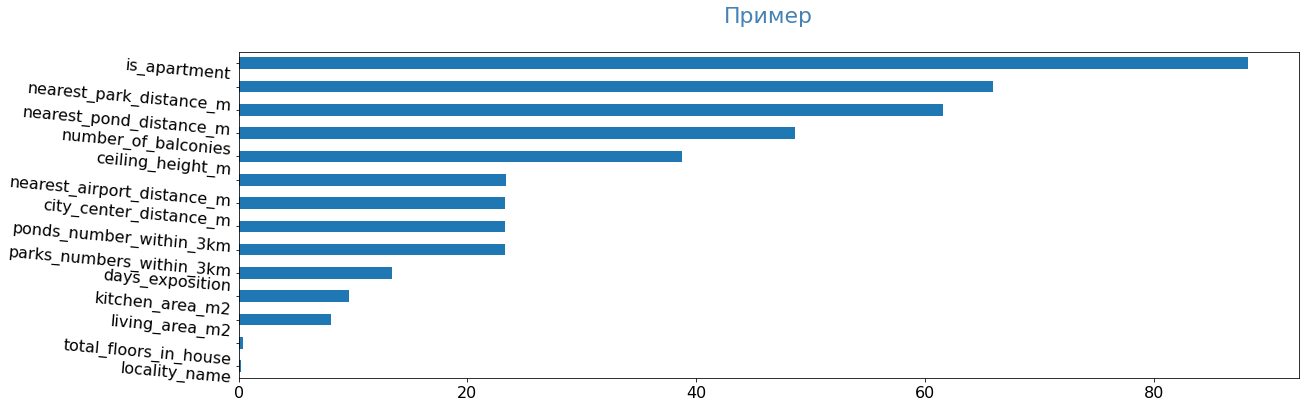

In [16]:
pass_value_barh(data)

Для начала разберемся со столбцом number_of_balconies. В этом столбце 11519 пропусков. Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [17]:
data['number_of_balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [18]:
data['number_of_balconies'] = data['number_of_balconies'].fillna (0)

In [19]:
data['number_of_balconies'].unique()

array([0., 2., 1., 5., 4., 3.])

Проверим результат и остались ли пропуски.

In [20]:
data['number_of_balconies'].isnull().sum()

0

Разберемся с апартаментами. Пропущенные значения заменим на False.

In [21]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [22]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Проверим результат.

In [23]:
data['is_apartment'].unique()

array([False,  True])

Проверим отсались ли пропуски.

In [24]:
data['is_apartment'].isnull().sum()

0

Далее разберемся с высотой потолка. Выведем уникальные занчения.

In [25]:
data['ceiling_height_m'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Далее заменим аномальные значения правильными.

In [26]:
data['ceiling_height_m'] = data['ceiling_height_m']. replace([3., 4., 25.,2.,5.,32.,8.,27.,\
                                                              24.,26.,14.,20.,6.,22.6,27.5,1.,100.],\
                                                             [3.0, 4.0, 2.5, 2.0, 5.0, 3.2, 8.0, 2.7,\
                                                              2.4, 2.6, 1.4, 2.0, 6.0, 2.26, 2.75, 1.0, 1.0])

Проверим. Затем разберемся с пропусками.

In [27]:
data['ceiling_height_m'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Пропущенные значения заменим медианным значением.

In [28]:
data['ceiling_height_m'].fillna(data['ceiling_height_m'].median(), inplace = True)

Проверим произошла ли замена.

In [29]:
data['ceiling_height_m'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

Проверим наш результат на наличие пропусков.

In [30]:
data['ceiling_height_m'].isna().sum()

0

Заменяем пустые значения жилой площади и площади кухни

In [31]:
living_ratio = data['living_area_m2'].mean() / data['total_area_m2'].mean()
kitchen_ratio = data['kitchen_area_m2'].mean() / data['total_area_m2'].mean()
data['living_area_m2'].fillna(living_ratio * data['total_area_m2'], inplace=True)
data['kitchen_area_m2'].fillna(kitchen_ratio * data['total_area_m2'], inplace=True)

In [32]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['total_floors_in_house'], inplace=True)

In [33]:
data.total_floors_in_house.value_counts()

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: total_floors_in_house, dtype: int64

In [34]:
data[data['floor'] > data['total_floors_in_house']]

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m


In [35]:
data.isnull().sum()

locality_name                     0
total_area_m2                     0
living_area_m2                    0
kitchen_area_m2                   0
ceiling_height_m                  0
number_of_rooms                   0
number_of_balconies               0
floor                             0
total_floors_in_house             0
is_apartment                      0
is_studio                         0
is_open_plan                      0
total_images                      0
last_price                        0
first_day_exposition              0
days_exposition                3171
city_center_distance_m         5501
nearest_airport_distance_m     5524
parks_numbers_within_3km       5500
nearest_park_distance_m       15535
ponds_number_within_3km        5500
nearest_pond_distance_m       14529
dtype: int64

Удалим неявные дубликаты из столбца.

In [36]:
data['locality_name'].duplicated().sum()

23201

In [37]:
data[data['locality_name'].duplicated(keep = False)==True].sort_values(by = 'total_area_m2' ).head(15)

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
19904,Санкт-Петербург,12.00,10.000000,2.101748,2.55,1,0.0,2,5.0,False,...,4,2400000.0,2017-07-19T00:00:00,200.0,964.0,21314.0,1.0,886.0,2.0,45.0
17961,Санкт-Петербург,13.00,7.422736,2.276894,2.60,1,0.0,1,9.0,False,...,3,1400000.0,2017-12-03T00:00:00,410.0,15945.0,14350.0,0.0,NaN,1.0,185.0
19546,Санкт-Петербург,13.00,7.422736,2.276894,3.40,1,0.0,2,5.0,False,...,3,1850000.0,2019-03-11T00:00:00,24.0,5483.0,24915.0,1.0,644.0,0.0,NaN
19807,Санкт-Петербург,13.00,10.000000,2.276894,2.65,1,0.0,3,5.0,False,...,0,3800000.0,2018-07-04T00:00:00,9.0,1242.0,21302.0,1.0,592.0,3.0,27.0
19558,Санкт-Петербург,13.20,7.536932,2.311923,2.65,1,0.0,1,5.0,False,...,2,1686000.0,2018-12-17T00:00:00,19.0,4165.0,19891.0,1.0,361.0,1.0,155.0
19642,Санкт-Петербург,14.00,11.000000,2.000000,2.65,1,0.0,1,5.0,False,...,5,1190000.0,2018-07-29T00:00:00,4.0,11122.0,9898.0,0.0,NaN,0.0,NaN
16949,Санкт-Петербург,15.00,8.564695,2.627186,2.70,1,0.0,1,9.0,False,...,9,1550000.0,2018-08-21T00:00:00,42.0,16376.0,51048.0,0.0,NaN,1.0,1079.0
12040,Сосновый Бор,15.00,8.564695,2.627186,2.50,1,0.0,1,5.0,False,...,5,1900000.0,2018-06-27T00:00:00,45.0,NaN,NaN,NaN,NaN,NaN,NaN
8886,Санкт-Петербург,15.50,10.000000,2.714758,2.65,0,0.0,2,5.0,False,...,10,2450000.0,2018-08-22T00:00:00,27.0,4589.0,24326.0,0.0,NaN,1.0,446.0
9412,Санкт-Петербург,16.00,13.000000,2.802331,2.65,0,0.0,1,6.0,False,...,5,2100000.0,2017-12-10T00:00:00,3.0,2111.0,20735.0,2.0,228.0,3.0,72.0


In [38]:
duplicated_names = data[data['locality_name'].duplicated() == True]['locality_name']

In [39]:
duplicated_names

2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
7            Санкт-Петербург
9            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23201, dtype: object

In [40]:
#data.drop_duplicates(['locality_name']) 

In [41]:
# check
df_one = data.drop_duplicates(['locality_name']) 
df_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 23683
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   locality_name               364 non-null    object 
 1   total_area_m2               364 non-null    float64
 2   living_area_m2              364 non-null    float64
 3   kitchen_area_m2             364 non-null    float64
 4   ceiling_height_m            364 non-null    float64
 5   number_of_rooms             364 non-null    int64  
 6   number_of_balconies         364 non-null    float64
 7   floor                       364 non-null    int64  
 8   total_floors_in_house       364 non-null    float64
 9   is_apartment                364 non-null    bool   
 10  is_studio                   364 non-null    bool   
 11  is_open_plan                364 non-null    bool   
 12  total_images                364 non-null    int64  
 13  last_price                  364 n

Приведем все значения к нижнему регистру.

In [42]:
data['locality_name'] = data['locality_name'].str.lower()

Выведем все варианты и посмотрим, что можно поправить.

In [43]:
data['locality_name'].unique().tolist()

['санкт-петербург',
 'посёлок шушары',
 'городской посёлок янино-1',
 'посёлок парголово',
 'посёлок мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'деревня кудрово',
 'коммунар',
 'колпино',
 'поселок городского типа красный бор',
 'гатчина',
 'поселок мурино',
 'деревня фёдоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'деревня новое девяткино',
 'посёлок металлострой',
 'посёлок городского типа лебяжье',
 'посёлок городского типа сиверский',
 'поселок молодцово',
 'поселок городского типа кузьмоловский',
 'садовое товарищество новая ропша',
 'павловск',
 'деревня пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'деревня куттузи',
 'посёлок аннино',
 'поселок городского типа ефимовский',
 'посёлок плодовое',
 'деревня заклинье',
 'поселок торковичи',
 'поселок первомайское',
 'красное село',
 'посёлок понтонный',
 'сясьстрой',
 'деревня старая',
 'деревня лесколово',
 'посёлок новый свет',
 'сланцы',
 'село путилово',
 'ивангород',
 '

Приведем к единому стилю названия, где встречаются буквы 'ё' и 'е'.

In [44]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

Удалим строки в которых не указано местоположение.

In [45]:
data = data.dropna(subset=['locality_name'])

Проверим на наличие пропусков.

In [46]:
data['locality_name'] .isnull().sum()

0

Устраним неявные дубликаты в названиях населенных пунктов в столбце ['locality_name']. Для начала выведем все уникальные значения этого столбца.

In [47]:
data.locality_name.unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

Видим, что у нас много названий мест, которые начинаются с "посёлок городского типа", "поселок городского типа", "городской поселок" и "поселок". За такими названиями могут скрываться дубликаты. Заменим это на пустоту и посмотрим на оставшиеся уникальные значения. Я создал список из значений, которые хочу убрать из названий методом replace. Далее циклом прохожу по списку уникальных локаций, и уже вложенным списком прохожу по каждой локации, убирая все ненужное.

In [48]:
replace_list = ['поселок городского типа ', 'посёлок городского типа ', 'городской поселок ', \
                'городской посёлок ', 'посёлок ', 'поселок ', 'деревня ', 'село ', 'пгт']
data['locality_unduplicated'] = data['locality_name']
for replace in replace_list:
    data['locality_unduplicated'] = data['locality_unduplicated'].str.replace(replace, '')
data.locality_unduplicated.sort_values().unique()

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'виллози',
       'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпоселок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара', 'ильичев

Сравним количество уникальных значений локаций до и после обработки неявных дубликатов.

In [49]:
print('до обработки дубликатов:', len(data.locality_name.unique()))
print('после обработки дубликатов:', len(data.locality_unduplicated.unique()))

до обработки дубликатов: 330
после обработки дубликатов: 311


Посмотрим на результат.

In [50]:
data[['locality_name', 'locality_unduplicated']]

,locality_name,locality_unduplicated
0,санкт-петербург,санкт-петербург
1,поселок шушары,шушары
2,санкт-петербург,санкт-петербург
3,санкт-петербург,санкт-петербург
4,санкт-петербург,санкт-петербург
...,...,...
23694,санкт-петербург,санкт-петербург
23695,тосно,тосно
23696,село рождествено,рождествено
23697,санкт-петербург,санкт-петербург


In [51]:
# check
data.locality_unduplicated.nunique()

311

**Вывод:** Найденные пропущенные значения выглядят не очень критично.
 - Пропуски в **locality_name** выглядят довольно странно, когда не указывают населенный пункт. Предположу, что свойственно это тем продавцам, которые уверены, что всем очевидно, что если они выставляют квартиру на продажу в разделе сайта "Санкт-Петербург", то и квартира в Санкт-Петербурге, не подозревая даже, что это может быть и Лен. область.
 - Пропуски в **living_area_m2** и **kitchen_area_m2** обусловлены тем,что данные, которые могут быть не заполнены просто по той причине, что они необязательны к заполнению, а высчитывать жилую площадь/площадь кухни продавцам некогда.
 - Информация в **days_exposition**  может отсутствовать, например, по причине того, что неизвестно когда было закрыто объявление о продаже, т.е., фактически, сделка была совершена, но не была закрыта на онлайн-ресурсе. По той же причине можем получить результаты в виде срока продажи квартиры в несколько лет.
 - Пропуски в **nearest_park_distance_m** и **parks_numbers_within_3km** обусловлены тем, что продавцы зачастую не знают число парков и расстояния до ближайщих из них. Такая же ситуация и с водоёмами **nearest_pond_distance_m** и **ponds_number_within_3km** данные просто не были заполнены.
 - Пропуски в **city_center_distance_m** и **nearest_airport_distance_m** обусловлены тем, что данные рассчитывала система. Они могут отустствовать по причине того, что относительно конкретно взятого населенного пункта/точки искались расстояние в определенном радиусе.
 - Пропуски в **ceiling_height_m** обусловлены тем, что большинство продавцов либо не знает реальную высоту потолков, либо считает не приоритетной такой критерий.
 - Пропуски в **number_of_balconies** обусловлены тем, что продавец не указал количество балконов, подразумевая тем самым их отсутствие.
 - Пропуски в **is_apartment** обусловлены тем, что продавец думал, что пропуск в этом критерии означает что это нет (например: это апартамент? Да или нет.)

### Рассмотрение типов данных в каждом столбце 

 Исходя из полученных данных принимаем решение изменить тип данных в следующих столбцах:
 - last_price - в целочисленный тип (Тем самым уберем копейки в цене)
 - first_day_exposition - даты в datetime (Для более понятного восприятия)
 - number_of_balconies - в целочисленный тип (Тут логическое объяснение не бывает 1.5 балкона)
 - days_exposition - в целочисленный тип (Количество дней в целое число, что логично)
 - nearest_airport_distance_m - в целочисленный тип (Для наилучшего восприятия данных расстояний)
 - parks_numbers_within_3km - в целочисленный тип (Для наилучшего восприятия данных расстояний)
 - nearest_park_distance_m - в целочисленный тип (Целое число парков, не бывает 1.5 парка)
 - ponds_number_within_3km - в целочисленный тип (Целое число водоемов, не бывает 1.5 водоема)
 - nearest_pond_distance_m -в целочисленный тип (Для наилучшего восприятия данных расстояний)
 - total_floors_in_house - в целочисленный тип (Логичное действие, не бывает 9.5 этажей)
 - city_center_distance_m - в целочисленный тип (Для наилучшего восприятия данных расстояний)
 - number_of_rooms - в целочисленный тип (Так будет понятнее)


Проработаем ситуацию по смене типов данных по порядку.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   locality_name               23565 non-null  object 
 1   total_area_m2               23565 non-null  float64
 2   living_area_m2              23565 non-null  float64
 3   kitchen_area_m2             23565 non-null  float64
 4   ceiling_height_m            23565 non-null  float64
 5   number_of_rooms             23565 non-null  int64  
 6   number_of_balconies         23565 non-null  float64
 7   floor                       23565 non-null  int64  
 8   total_floors_in_house       23565 non-null  float64
 9   is_apartment                23565 non-null  bool   
 10  is_studio                   23565 non-null  bool   
 11  is_open_plan                23565 non-null  bool   
 12  total_images                23565 non-null  int64  
 13  last_price                  235

In [53]:
data.shape[0]

23565

In [54]:
data['days_exposition'].isnull().sum()

3171

In [55]:
data['days_exposition'].fillna(data['days_exposition'].median(), inplace = True)

In [56]:
data['days_exposition'].head(10)

0     95.0
1     81.0
2    558.0
3    424.0
4    121.0
5     55.0
6    155.0
7     95.0
8    189.0
9    289.0
Name: days_exposition, dtype: float64

In [57]:
data['days_exposition'] = data['days_exposition'].astype('int64')

In [58]:
data['days_exposition'].isnull().sum()

0

In [59]:
data['nearest_airport_distance_m'].isnull().sum()

5524

In [60]:
data['nearest_airport_distance_m'].fillna(data['nearest_airport_distance_m'].median(), inplace = True)

In [61]:
data['nearest_airport_distance_m'].head(10)

0    18863.0
1    12817.0
2    21741.0
3    28098.0
4    31856.0
5    26757.0
6    52996.0
7    23982.0
8    26757.0
9    50898.0
Name: nearest_airport_distance_m, dtype: float64

In [62]:
data['last_price'] = data['last_price'].astype(int)

In [63]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [64]:
data['number_of_balconies'] = data['number_of_balconies'].astype('int64')

In [65]:
data['parks_numbers_within_3km'] = data['parks_numbers_within_3km'].fillna(value=0).astype(int)

In [66]:
data['ponds_number_within_3km'] = data['ponds_number_within_3km'].fillna(value=0).astype(int)

In [67]:
data['number_of_rooms'] = data['number_of_rooms'].fillna(0).astype(int)

In [68]:
data['nearest_park_distance_m'].fillna(data['nearest_park_distance_m'].median(), inplace = True)

In [69]:
data['nearest_park_distance_m'] = data['nearest_park_distance_m'].astype('int64')

In [70]:
data['nearest_pond_distance_m'].fillna(data['nearest_pond_distance_m'].median(), inplace = True)

In [71]:
data['nearest_pond_distance_m'] = data['nearest_pond_distance_m'].astype('int64')

In [72]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   locality_name               23565 non-null  object        
 1   total_area_m2               23565 non-null  float64       
 2   living_area_m2              23565 non-null  float64       
 3   kitchen_area_m2             23565 non-null  float64       
 4   ceiling_height_m            23565 non-null  float64       
 5   number_of_rooms             23565 non-null  int64         
 6   number_of_balconies         23565 non-null  int64         
 7   floor                       23565 non-null  int64         
 8   total_floors_in_house       23565 non-null  float64       
 9   is_apartment                23565 non-null  bool          
 10  is_studio                   23565 non-null  bool          
 11  is_open_plan                23565 non-null  bool      

In [73]:
data['total_floors_in_house'].fillna(data['total_floors_in_house'].median(), inplace = True)

In [76]:
data['city_center_distance_m'] = data['city_center_distance_m'].astype('int64')

In [77]:
data.isnull().sum()

locality_name                 0
total_area_m2                 0
living_area_m2                0
kitchen_area_m2               0
ceiling_height_m              0
number_of_rooms               0
number_of_balconies           0
floor                         0
total_floors_in_house         0
is_apartment                  0
is_studio                     0
is_open_plan                  0
total_images                  0
last_price                    0
first_day_exposition          0
days_exposition               0
city_center_distance_m        0
nearest_airport_distance_m    0
parks_numbers_within_3km      0
nearest_park_distance_m       0
ponds_number_within_3km       0
nearest_pond_distance_m       0
locality_unduplicated         0
dtype: int64

Проверим результат изменений.

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   locality_name               23565 non-null  object        
 1   total_area_m2               23565 non-null  float64       
 2   living_area_m2              23565 non-null  float64       
 3   kitchen_area_m2             23565 non-null  float64       
 4   ceiling_height_m            23565 non-null  float64       
 5   number_of_rooms             23565 non-null  int64         
 6   number_of_balconies         23565 non-null  int64         
 7   floor                       23565 non-null  int64         
 8   total_floors_in_house       23565 non-null  int64         
 9   is_apartment                23565 non-null  bool          
 10  is_studio                   23565 non-null  bool          
 11  is_open_plan                23565 non-null  bool      

**Вывод:** Поменяли тип данных там, где это необходимо. Удалили лишнее. Так действительно будет лучше. Идём дальше.

#### check gap

In [79]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   locality_name               23565 non-null  object        
 1   total_area_m2               23565 non-null  float64       
 2   living_area_m2              23565 non-null  float64       
 3   kitchen_area_m2             23565 non-null  float64       
 4   ceiling_height_m            23565 non-null  float64       
 5   number_of_rooms             23565 non-null  int64         
 6   number_of_balconies         23565 non-null  int64         
 7   floor                       23565 non-null  int64         
 8   total_floors_in_house       23565 non-null  int64         
 9   is_apartment                23565 non-null  bool          
 10  is_studio                   23565 non-null  bool          
 11  is_open_plan                23565 non-null  bool      

In [80]:
data.columns

Index(['locality_name', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2',
       'ceiling_height_m', 'number_of_rooms', 'number_of_balconies', 'floor',
       'total_floors_in_house', 'is_apartment', 'is_studio', 'is_open_plan',
       'total_images', 'last_price', 'first_day_exposition', 'days_exposition',
       'city_center_distance_m', 'nearest_airport_distance_m',
       'parks_numbers_within_3km', 'nearest_park_distance_m',
       'ponds_number_within_3km', 'nearest_pond_distance_m',
       'locality_unduplicated'],
      dtype='object')

In [81]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['total_area_m2', 'living_area_m2', 'kitchen_area_m2',
       'ceiling_height_m', 'number_of_rooms',  'floor',
       'total_floors_in_house', 
       'last_price', 'days_exposition']]
    .apply (['count', 'min', 'max','median'])   
    .style.format("{:,.2f}")
)

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,floor,total_floors_in_house,last_price,days_exposition
count,"23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00"
min,12.00,2.00,1.30,1.00,0.00,1.00,1.00,"12,190.00",1.00
max,900.00,409.70,112.00,10.30,19.00,33.00,60.00,"763,000,000.00","1,580.00"
median,52.00,30.00,9.00,2.65,2.00,4.00,9.00,"4,646,000.00",95.00


In [82]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [83]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


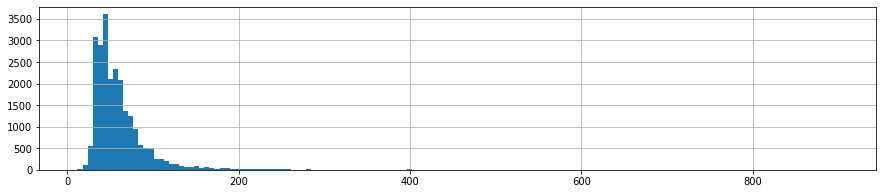

In [84]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

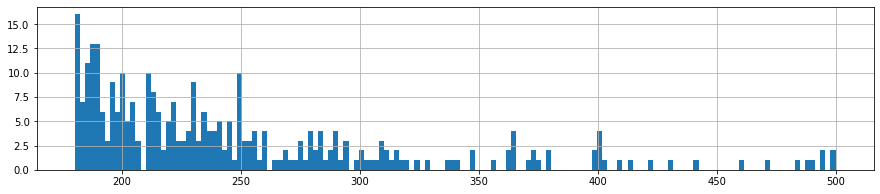

In [85]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

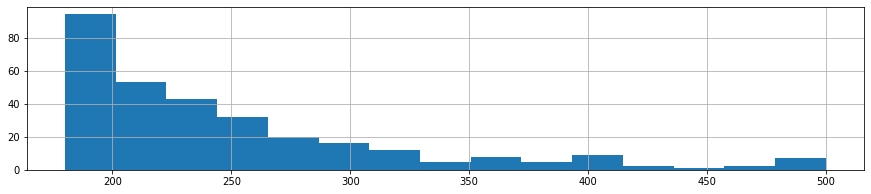

In [86]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

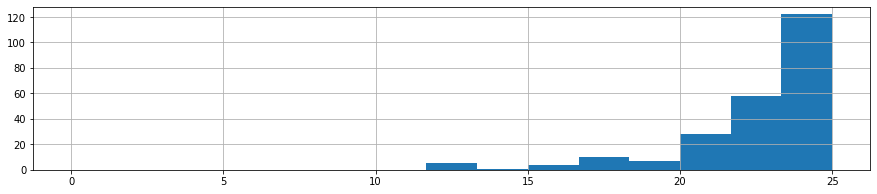

In [87]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [88]:
data[data['total_area_m2'] < 20]['total_area_m2'].count()

27

In [89]:
data = data[data['total_area_m2'] > 20]

In [90]:
data['diff'] = data['total_area_m2'] - data['living_area_m2'] - data['kitchen_area_m2']
display(sum(data['diff'] < 0))
data = data[data['diff'] > 0] 
data = data.drop('diff', axis=1)

116

In [91]:
data[data['total_area_m2'] > 250]['total_area_m2'].count()

111

In [92]:
display((data[data['ceiling_height_m'] > 5]['ceiling_height_m'].count() + 
         data[data['ceiling_height_m'] < 2.5]['ceiling_height_m'].count()))

87

In [93]:
data.loc[(data['ceiling_height_m'] < 2.5) | (data['ceiling_height_m'] > 5), 'ceiling_height_m'] = None 
data['ceiling_height_m'].describe()

count    23266.000000
mean         2.696845
std          0.214594
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height_m, dtype: float64

In [94]:
def delete_outliers(data, column,graphic=0,x=10,y=10):
    q1 = data[column].quantile(0.25)                 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    anomaly = (data[column] >= (q1 - 1.5*iqr)) & (data[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return data.loc[anomaly].boxplot([column], figsize=(x,y))
    else:
        return data.loc[anomaly]

(0.0, 150.0)

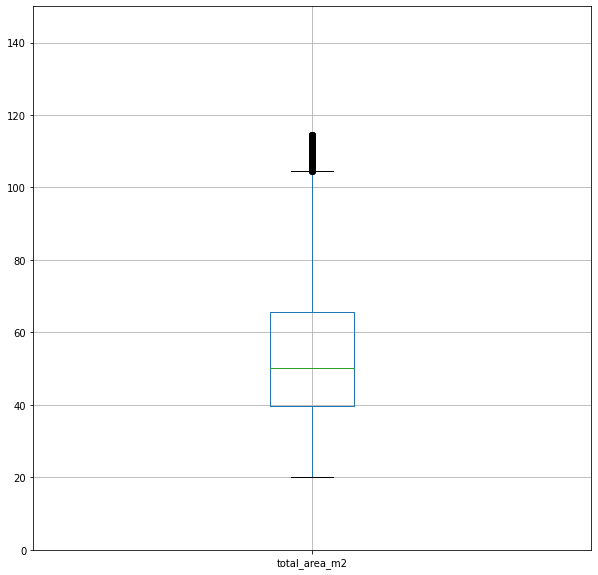

In [95]:
delete_outliers(data,'total_area_m2',1,10,10).set_ylim(0,150)

(0.0, 10000000.0)

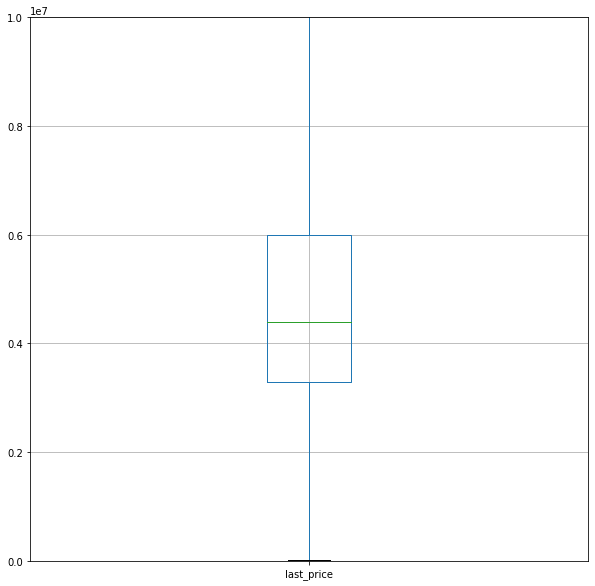

In [96]:
delete_outliers(data,'last_price',1,10,10).set_ylim(0, 10000000)

(0.0, 200.0)

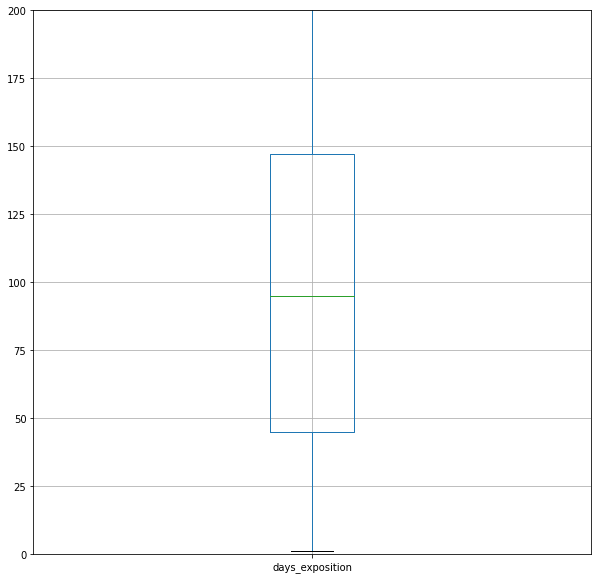

In [97]:
delete_outliers(data,'days_exposition',1,10,10).set_ylim(0, 200)

(0.0, 75.0)

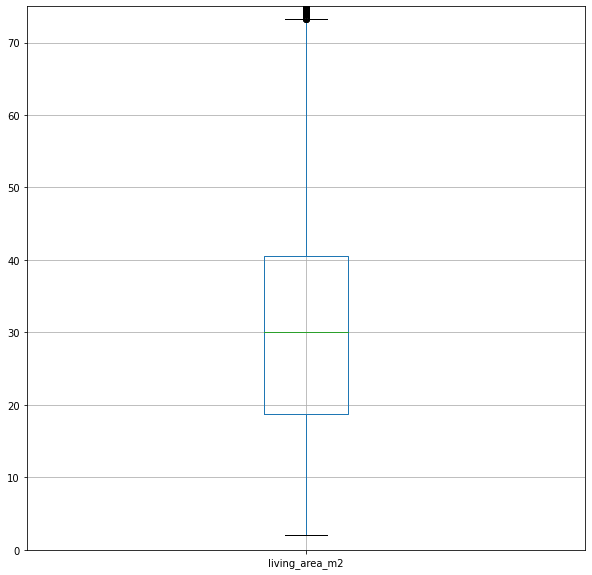

In [98]:
delete_outliers(data,'living_area_m2',1,10,10).set_ylim(0, 75)


(0.0, 20.0)

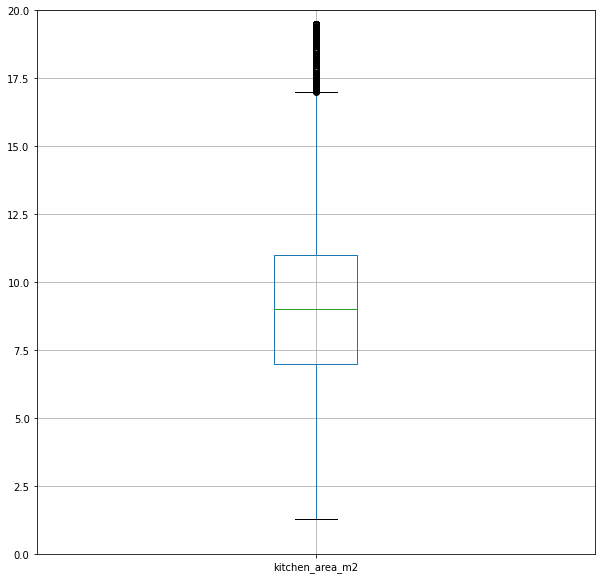

In [99]:
delete_outliers(data,'kitchen_area_m2',1,10,10).set_ylim(0, 20)

(2.5, 2.8)

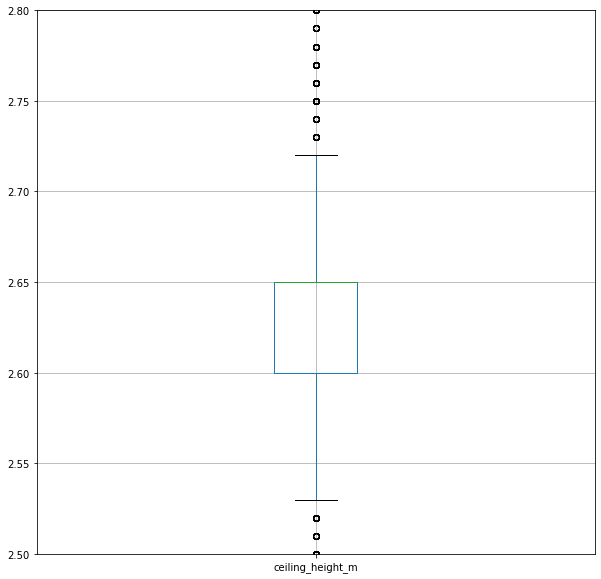

In [100]:
delete_outliers(data,'ceiling_height_m',1,10,10).set_ylim(2.5, 2.8)

(0.0, 6.0)

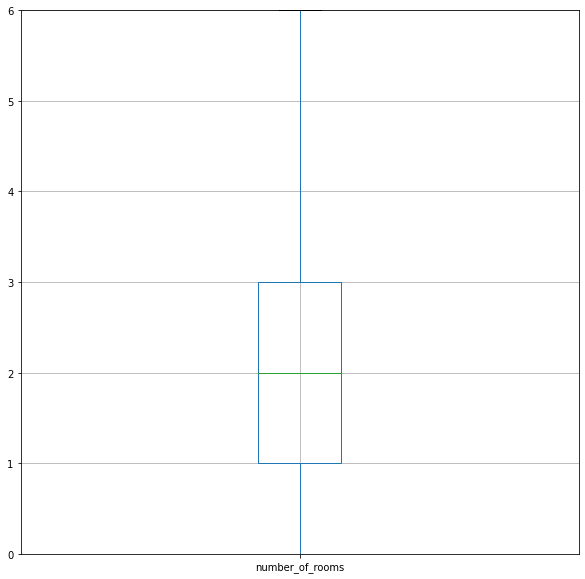

In [101]:
delete_outliers(data,'number_of_rooms',1,10,10).set_ylim(0, 6)

(0.0, 25.0)

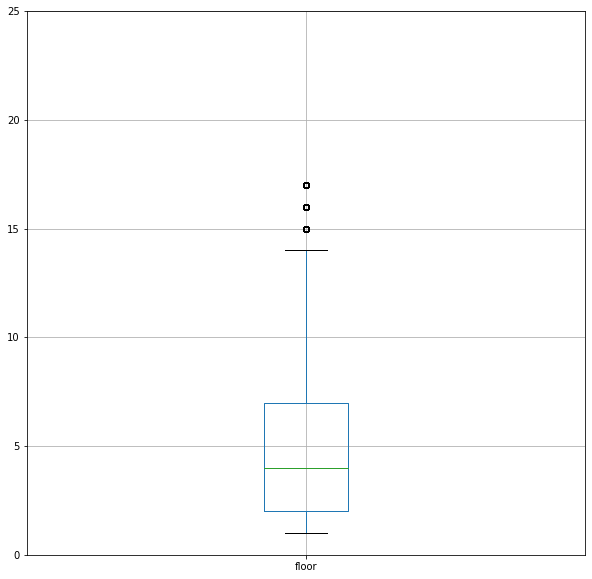

In [102]:
delete_outliers(data,'floor',1,10,10).set_ylim(0, 25)

(0.0, 50.0)

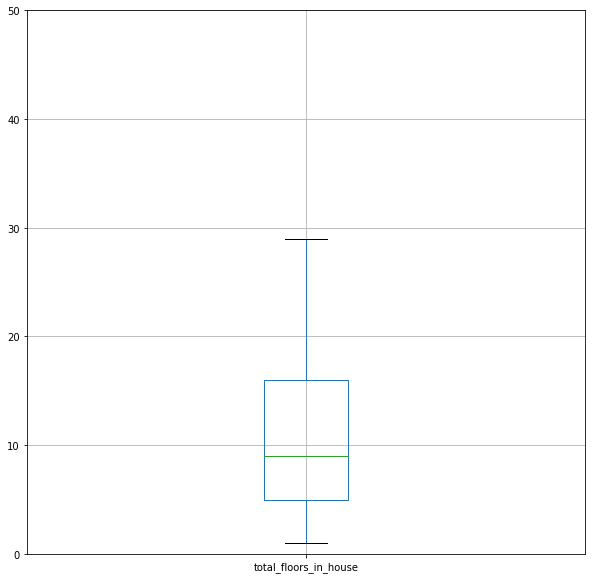

In [103]:
delete_outliers(data,'total_floors_in_house',1,10,10).set_ylim(0, 50)

In [104]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['total_area_m2', 'living_area_m2', 'kitchen_area_m2',
       'ceiling_height_m', 'number_of_rooms',  'floor',
       'total_floors_in_house', 
       'last_price', 'days_exposition']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,floor,total_floors_in_house,last_price,days_exposition
0.0012,22.00,10.00,3.73,2.50,0.00,1.00,2.00,"565,336.00",3.00
0.01,26.03,13.10,4.55,2.50,1.00,1.00,2.00,"1,000,000.00",4.00
0.5,52.00,30.00,9.00,2.65,2.00,4.00,9.00,"4,650,000.00",95.00
0.99,197.54,122.00,35.19,3.55,5.00,23.00,26.00,"36,000,000.00","1,045.48"
0.9988,380.00,229.96,63.86,4.20,8.00,26.00,34.98,"124,477,088.00","1,361.98"


In [105]:
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

In [106]:
list_features = ['last_price', 'total_area_m2', 'kitchen_area_m2', 'living_area_m2', 'days_exposition', 'ceiling_height_m', 'number_of_rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

In [107]:
data.describe()

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,total_images,last_price,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
count,22126.000000,22482.000000,22075.000000,20423.000000,23161.000000,23353.000000,23353.000000,23353.000000,23353.000000,2.132300e+04,21049.000000,23353.000000,23353.000000,23353.000000,23353.000000,23353.000000,23353.000000
mean,54.439365,31.516117,9.426548,2.631093,2.034843,0.592558,5.877275,10.670835,9.884897,4.844145e+06,113.307948,13950.165546,28333.000514,0.468848,467.333362,0.589860,508.785424
std,19.301827,13.728505,3.164612,0.081455,0.971860,0.959843,4.866487,6.584590,5.675313,2.211579e+06,96.827184,7563.300471,11098.423253,0.748001,199.971062,0.883252,172.271306
min,20.100000,2.000000,1.300000,2.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.219000e+04,1.000000,181.000000,0.000000,0.000000,1.000000,0.000000,13.000000
25%,39.600000,18.700000,7.000000,2.600000,1.000000,0.000000,2.000000,5.000000,6.000000,3.300000e+06,45.000000,10939.000000,21137.000000,0.000000,455.000000,0.000000,503.000000
50%,50.200000,30.000000,9.000000,2.650000,2.000000,0.000000,4.000000,9.000000,9.000000,4.400000e+06,95.000000,13096.000000,26757.000000,0.000000,455.000000,0.000000,503.000000
75%,65.600000,40.539556,11.000000,2.650000,3.000000,1.000000,8.000000,16.000000,14.000000,6.000000e+06,147.000000,15254.000000,34375.000000,1.000000,455.000000,1.000000,503.000000
max,114.600000,76.700000,19.450000,2.850000,5.000000,5.000000,33.000000,60.000000,50.000000,1.182000e+07,429.000000,65968.000000,84869.000000,3.000000,3190.000000,3.000000,1344.000000


In [108]:
data.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated
0,санкт-петербург,108.0,51.0,NaN,2.70,3.0,0,8,16,False,...,NaN,2019-03-07,95.0,16028,18863.0,1,482,2,755,санкт-петербург
1,поселок шушары,40.4,18.6,11.0,2.65,1.0,2,1,11,False,...,3350000.0,2018-12-04,81.0,18603,12817.0,0,455,0,503,шушары
2,санкт-петербург,56.0,34.3,8.3,2.65,2.0,0,4,5,False,...,5196000.0,2015-08-20,NaN,13933,21741.0,1,90,2,574,санкт-петербург
3,санкт-петербург,NaN,NaN,NaN,2.65,3.0,0,9,14,False,...,NaN,2015-07-24,424.0,6800,28098.0,2,84,3,234,санкт-петербург
4,санкт-петербург,100.0,32.0,NaN,NaN,2.0,0,13,14,False,...,10000000.0,2018-06-19,121.0,8098,31856.0,2,112,1,48,санкт-петербург


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23353 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   locality_name               23353 non-null  object        
 1   total_area_m2               22126 non-null  float64       
 2   living_area_m2              22482 non-null  float64       
 3   kitchen_area_m2             22075 non-null  float64       
 4   ceiling_height_m            20423 non-null  float64       
 5   number_of_rooms             23161 non-null  float64       
 6   number_of_balconies         23353 non-null  int64         
 7   floor                       23353 non-null  int64         
 8   total_floors_in_house       23353 non-null  int64         
 9   is_apartment                23353 non-null  bool          
 10  is_studio                   23353 non-null  bool          
 11  is_open_plan                23353 non-null  bool      

In [110]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['total_area_m2', 'living_area_m2', 'kitchen_area_m2',
       'ceiling_height_m', 'number_of_rooms',  'floor',
       'total_floors_in_house', 
       'last_price', 'days_exposition']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,floor,total_floors_in_house,last_price,days_exposition
count,"22,126.00","22,482.00","22,075.00","20,423.00","23,161.00","23,353.00","23,353.00","21,323.00","21,049.00"
min,20.10,2.00,1.30,2.50,0.00,1.00,1.00,"12,190.00",1.00
max,114.60,76.70,19.45,2.85,5.00,33.00,60.00,"11,820,000.00",429.00


## Посчитаем и добавим в таблицу новые столбцы.

### Посчитаем цену за один квадратный метр.

In [111]:
data['sq_meter_price'] = data['last_price'] / data['total_area_m2']

In [112]:
data['sq_meter_price'] = data['sq_meter_price'].round(1)

Проверим результат.

In [113]:
data.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price
0,санкт-петербург,108.0,51.0,NaN,2.70,3.0,0,8,16,False,...,2019-03-07,95.0,16028,18863.0,1,482,2,755,санкт-петербург,NaN
1,поселок шушары,40.4,18.6,11.0,2.65,1.0,2,1,11,False,...,2018-12-04,81.0,18603,12817.0,0,455,0,503,шушары,82920.8
2,санкт-петербург,56.0,34.3,8.3,2.65,2.0,0,4,5,False,...,2015-08-20,NaN,13933,21741.0,1,90,2,574,санкт-петербург,92785.7
3,санкт-петербург,NaN,NaN,NaN,2.65,3.0,0,9,14,False,...,2015-07-24,424.0,6800,28098.0,2,84,3,234,санкт-петербург,NaN
4,санкт-петербург,100.0,32.0,NaN,NaN,2.0,0,13,14,False,...,2018-06-19,121.0,8098,31856.0,2,112,1,48,санкт-петербург,100000.0


### Добавим год, месяц и день публикации объявления.

Добавим год и месяц публикации объявления.

In [114]:
data['year'] = data['first_day_exposition'].apply(lambda x: x.year)
data['month'] = data['first_day_exposition'].apply(lambda x: x.month)

Добавим день недели публикации объявления:
Сначала проставим день недели в формате числа (0 — понедельник, 1 — вторник и так далее):

In [115]:
data['day'] = data['first_day_exposition'].dt.weekday

Теперь создадим словарь, чтобы изменить значение с чисел на текст (напр., 'суббота'):

In [116]:
data['day'].unique()

array([3, 1, 4, 0, 2, 6, 5])

Проверим результат.

In [117]:
data.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price,year,month,day
0,санкт-петербург,108.0,51.0,NaN,2.70,3.0,0,8,16,False,...,18863.0,1,482,2,755,санкт-петербург,NaN,2019,3,3
1,поселок шушары,40.4,18.6,11.0,2.65,1.0,2,1,11,False,...,12817.0,0,455,0,503,шушары,82920.8,2018,12,1
2,санкт-петербург,56.0,34.3,8.3,2.65,2.0,0,4,5,False,...,21741.0,1,90,2,574,санкт-петербург,92785.7,2015,8,3
3,санкт-петербург,NaN,NaN,NaN,2.65,3.0,0,9,14,False,...,28098.0,2,84,3,234,санкт-петербург,NaN,2015,7,4
4,санкт-петербург,100.0,32.0,NaN,NaN,2.0,0,13,14,False,...,31856.0,2,112,1,48,санкт-петербург,100000.0,2018,6,1


### Добавим тип этажа квартиры (значения — «‎первый», «последний», «другой»);

Создадим категории для значений этажей.

In [118]:
def floor_group(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['total_floors_in_house']:
        return 'Последний'
    else:
        return 'Другой'
data['categorised_floor'] = data.apply(floor_group, axis=1)

Проверим результат.

In [119]:
data[['floor', 'total_floors_in_house','categorised_floor']].sample(15)

,floor,total_floors_in_house,categorised_floor
356,4,9,Другой
20882,5,9,Другой
4100,15,23,Другой
6166,6,6,Последний
18933,8,11,Другой
16848,8,10,Другой
17561,3,9,Другой
16509,8,16,Другой
14478,4,5,Другой
13072,5,10,Другой


### Добавим расстояние до центра города в километрах (переведем из м в км и округлим до целых значений).

In [120]:
data['city_center_distance_km'] = data['city_center_distance_m'] / 1000

In [121]:
data['city_center_distance_km'] = data['city_center_distance_km'].fillna(value=0).astype(int)

Проверим результат.

In [122]:
data.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price,year,month,day,categorised_floor,city_center_distance_km
0,санкт-петербург,108.0,51.0,NaN,2.70,3.0,0,8,16,False,...,482,2,755,санкт-петербург,NaN,2019,3,3,Другой,16
1,поселок шушары,40.4,18.6,11.0,2.65,1.0,2,1,11,False,...,455,0,503,шушары,82920.8,2018,12,1,Первый,18
2,санкт-петербург,56.0,34.3,8.3,2.65,2.0,0,4,5,False,...,90,2,574,санкт-петербург,92785.7,2015,8,3,Другой,13
3,санкт-петербург,NaN,NaN,NaN,2.65,3.0,0,9,14,False,...,84,3,234,санкт-петербург,NaN,2015,7,4,Другой,6
4,санкт-петербург,100.0,32.0,NaN,NaN,2.0,0,13,14,False,...,112,1,48,санкт-петербург,100000.0,2018,6,1,Другой,8


**Вывод:** Добавили новые данные в нашу таблицу. Рассчитали цену за один квадратный метр квартиры. Добавили расширенные данные, добавив год, месяц и день подачи объявления.

## Проведите исследовательский анализ данных

### Изучим следующие параметры объектов:

#### Общая площадь

Построим гистограмму распределения значений общей площади.

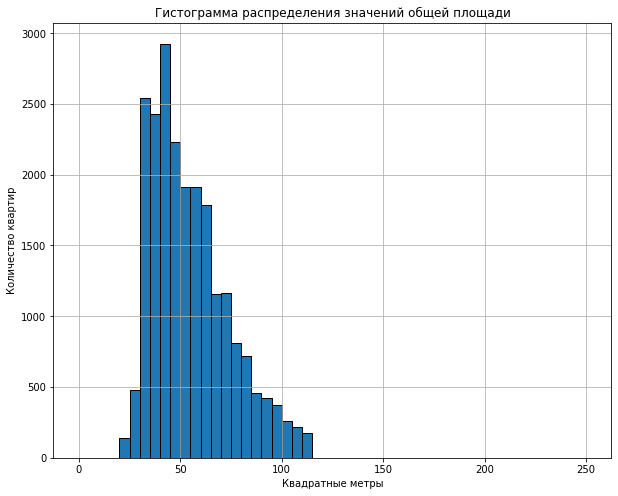

In [123]:
plt.figure(figsize=(10,8))
data['total_area_m2'].hist(bins=50, range=(0,250), ec='black')
plt.title('Гистограмма распределения значений общей площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Вычислим статистические данные.

In [124]:
data['total_area_m2'].describe()

count    22126.000000
mean        54.439365
std         19.301827
min         20.100000
25%         39.600000
50%         50.200000
75%         65.600000
max        114.600000
Name: total_area_m2, dtype: float64

**Наблюдения:** Средняя общая площадь составляет 54.43 квадратных метра, что вполне правдоподобно. 114.6 квдратных метров это самая большая квартира. Самая минимальная общая площадь это 20.1 квадратов (скорее всего это будут студии).

#### Жилая площадь

Построим гистограмму распределения значений жилой площади.

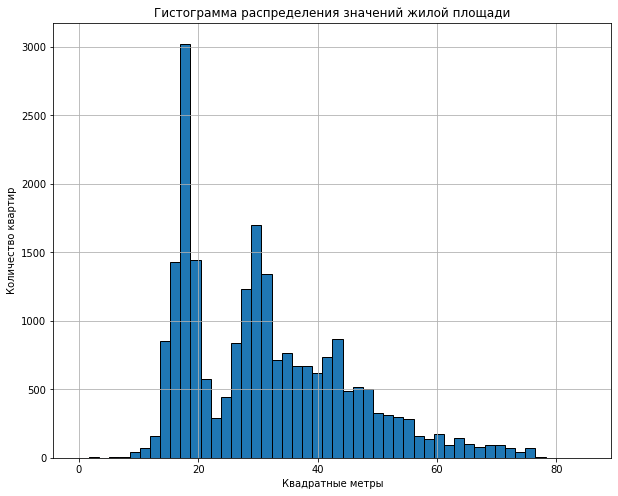

In [125]:
plt.figure(figsize=(10,8))
data['living_area_m2'].hist(bins=50, range=(0,85), ec='black')
plt.title('Гистограмма распределения значений жилой площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Вычислим статистические данные.

In [126]:
data['living_area_m2'].describe()

count    22482.000000
mean        31.516117
std         13.728505
min          2.000000
25%         18.700000
50%         30.000000
75%         40.539556
max         76.700000
Name: living_area_m2, dtype: float64

**Наблюдения:** Средняя жилая площадь стоставляет 31.51 квадратных метра, это подразумевается большая комната плюс маленькая наверное. Минимальная составляет всего два квдрата. Максимальная жилая площадь составила 76.7 квадратов.

#### Площадь кухни

Построим гистограмму распределения значений площади кухни.

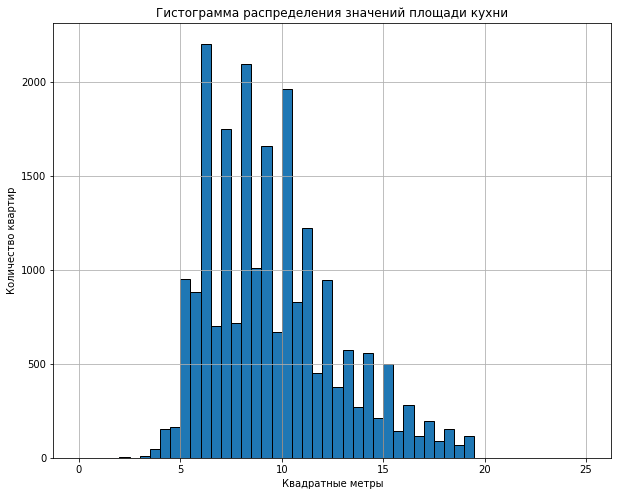

In [127]:
plt.figure(figsize=(10,8))
data['kitchen_area_m2'].hist(bins=50, range=(0,25), ec='black')
plt.title('Гистограмма распределения значений площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Вычислим статистические данные.

In [128]:
data['kitchen_area_m2'].describe()

count    22075.000000
mean         9.426548
std          3.164612
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         19.450000
Name: kitchen_area_m2, dtype: float64

**Наблюдения:** Средняя площадь кухни составляет 9.42 квадратных метра, что правдободобно. Маленькие кухни очень часто встречаются, редко у кого встретишь большие кухни. Минимальный размер кухни в 1.3 квадрата это скорее всего в студиях, где общее пространство соединено. Максимальная площадь кухни составила 19.45 квадратных метра.

#### Цена объекта

Построим гистограмму распределения по значению цены объекта.

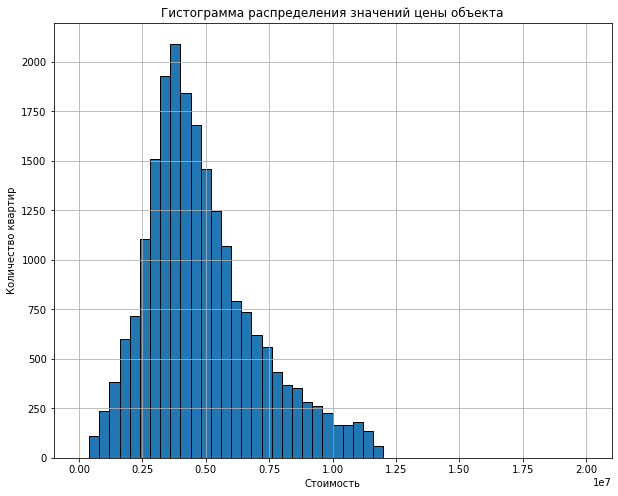

In [129]:
plt.figure(figsize=(10,8))
plt.hist(data['last_price'], bins=50, range=(0,20000000), ec='black')
plt.title('Гистограмма распределения значений цены объекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.grid()
plt.show()

Вычислим статистические данные.

In [130]:
data['last_price'].describe().round()

count       21323.0
mean      4844145.0
std       2211579.0
min         12190.0
25%       3300000.0
50%       4400000.0
75%       6000000.0
max      11820000.0
Name: last_price, dtype: float64

**Наблюдения:** Средняя цена квартиры составляет 4844145 что вполне соответсвует средней площади среднестатистической квартиры. Цены растут, нисмотря на кризисы. Недвижимость будет всегда в цене. Минимальная цена составляет 12190. Максимальная стоимость квартиры составляет 11820000.

#### Количество комнат

Построим гистограмму распределения по количеству комнат.

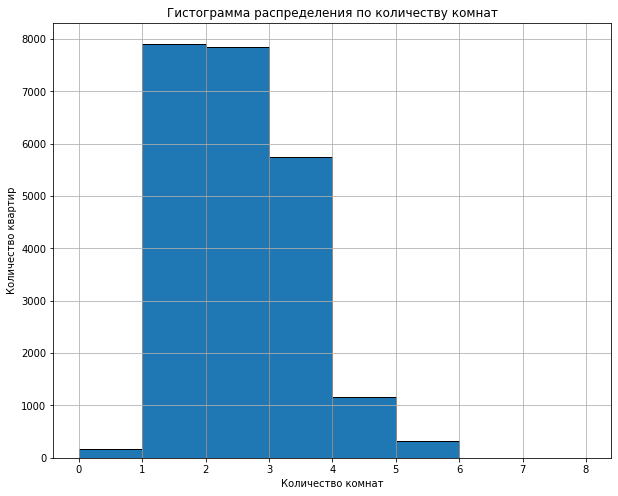

In [131]:
plt.figure(figsize=(10,8))
data['number_of_rooms'].hist(bins = 8, range=(0,8), ec='black')
plt.title('Гистограмма распределения по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Вычислим статистические данные.

In [132]:
data['number_of_rooms'].describe()

count    23161.000000
mean         2.034843
std          0.971860
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_rooms, dtype: float64

**Наблюдения:** Средняя квартира по рынку это получается квартиры с двумя раздельными комнатами. Следом на рынке идут однокомнатные квартиры (сюда я так понимаю входят и студии) и закрывают трехкомнатные квартиры. По графику видно, что квартиры в которых встречаются более трех комнат мало продаются, так как спрос на такие квартиры не большой.

#### Высота потолков

Построим гистограмму распределения по высоте потолков.

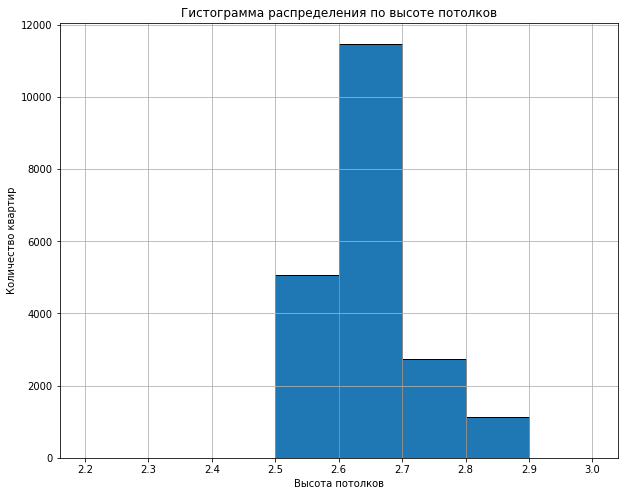

In [133]:
plt.figure(figsize=(10,8))
data['ceiling_height_m'].hist(bins=8, range=(2.2,3), ec='black')
plt.title('Гистограмма распределения по высоте потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

Вычислим статистические данные.

In [134]:
data['ceiling_height_m'].describe().round()

count    20423.0
mean         3.0
std          0.0
min          2.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: ceiling_height_m, dtype: float64

**Наблюдения:** Интересный параметр как высота потолков, по моему мнению мало встречаются люди, которые покупают квартиру придерживаясь критерия по высоте потолков. Я как среднестатистический потребитель, покупая себе квартиру не знал и до сих пор не знаю какая высота потолков в моей квартире). Средняя высота состаялет 3.0, но встречаются и больше трёх - это скореее всего наследие советских сталинок. Раньше строили с размахом квартиры.

#### Этаж квартиры

Построим гистограмму распределения по этажам.

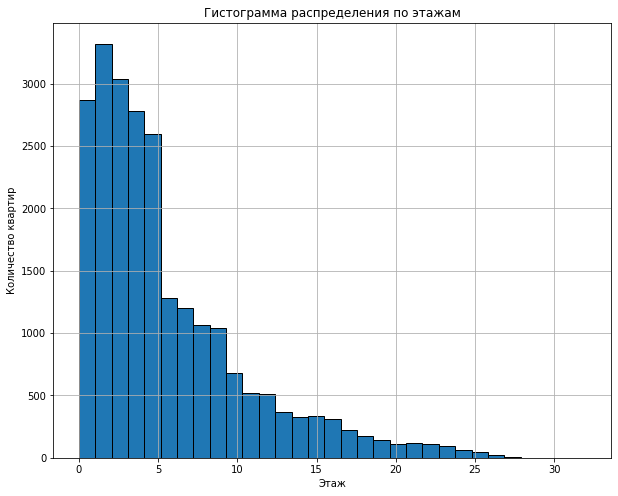

In [135]:
plt.figure(figsize=(10,8))
data['floor'].hist(bins = 31, range=(0,32), ec='black')
plt.title('Гистограмма распределения по этажам')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Вычислим статистические данные.

In [136]:
data['floor'].describe()

count    23353.000000
mean         5.877275
std          4.866487
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

**Наблюдения:** Средний этаж по объявлениям составляет 5-6 этаж. Минимальный этаж соответственно 1. Максимальный этаж 33. 

#### Тип этажа квартиры

Построим гистограмму распределения по типу этажа квартиры.

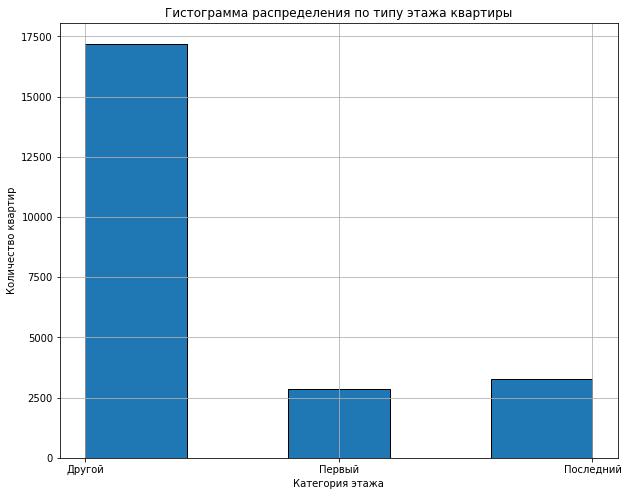

In [137]:
plt.figure(figsize=(10,8))
data['categorised_floor'].hist(bins=5, range=(0,2), ec='black')
plt.title('Гистограмма распределения по типу этажа квартиры')
plt.xlabel('Категория этажа')
plt.ylabel('Количество квартир')
plt.show()

**Наблюдения:** Как видим большинство квартир продаются, находясь ни на первом, ни на последнем этаже. Это факт. Я бы не хотел жить на первом этаже, где постоянно будут заглядывать к тебе в окна, и не на последнем, где постоянно будет протекать крыша). Количество квартир на первом и последнем этаже примерно одинаково. Последний этаж предпочитают больше чем первый.

#### Общее количество этажей в доме

Построим гистограмму распределения по общему числу этажей в доме.

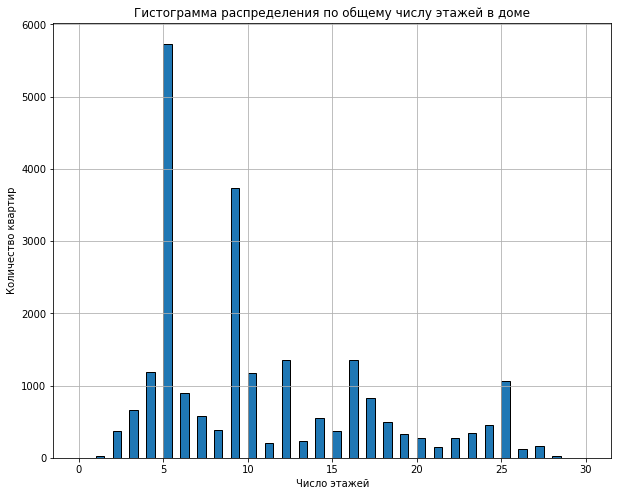

In [138]:
plt.figure(figsize=(10,8))
data['total_floors_in_house'].hist(bins=60, range=(0,30), ec='black')
plt.title('Гистограмма распределения по общему числу этажей в доме')
plt.xlabel('Число этажей')
plt.ylabel('Количество квартир')
plt.show()

Вычислим статистические данные.

In [139]:
data['total_floors_in_house'].describe().round()

count    23353.0
mean        11.0
std          7.0
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: total_floors_in_house, dtype: float64

**Наблюдения:** Среднее количество этажей в доме стоставляет 11 этажей. Но по графику видно, что больше всего пятиэтажных зданий, следом идут девятиэтажки, после них идут здания в которых менее пяти этажей и так далее. Центр Санкт-Петербурга это в основном малоэтажные застройки, а вот чем дальше от центра появляются новые районы с многоэтажками.

#### Расстояние до центра города в метрах

Построим гистограмму распределения по расстоянию до центра города в метрах.

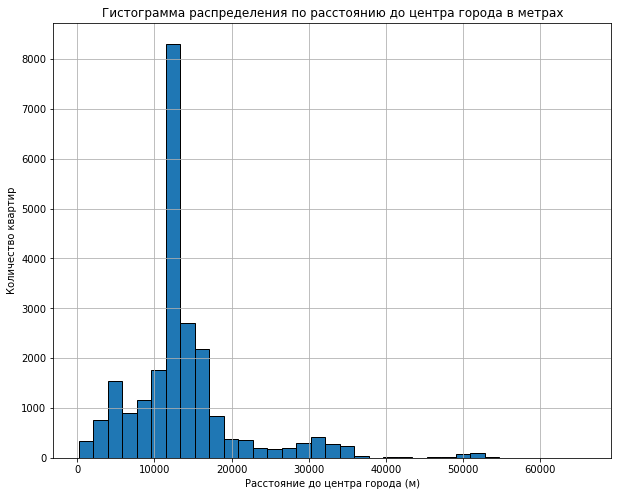

In [140]:
plt.figure(figsize=(10,8))
data['city_center_distance_m'].hist(bins=35, ec='black')
plt.title('Гистограмма распределения по расстоянию до центра города в метрах')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Количество квартир')
plt.show()

Вычислим статистические данные.

In [141]:
data['city_center_distance_m'].describe().round()

count    23353.0
mean     13950.0
std       7563.0
min        181.0
25%      10939.0
50%      13096.0
75%      15254.0
max      65968.0
Name: city_center_distance_m, dtype: float64

**Наблюдения:** Среднее расстояние до центра города составляет 13950.0 метров. Большинство квартир расположены в принципе недалеко от центра города. Есть и такие квартиры где минимальное расстояние до центра города состовляет 181.0 метр, считай в самом историческом центре. Максимальное расстояние составялет 65968.0 метров.

#### Расстояние до ближайшего аэропорта

Построим гистограмму распределения по расстоянию до аэропорта в метрах.

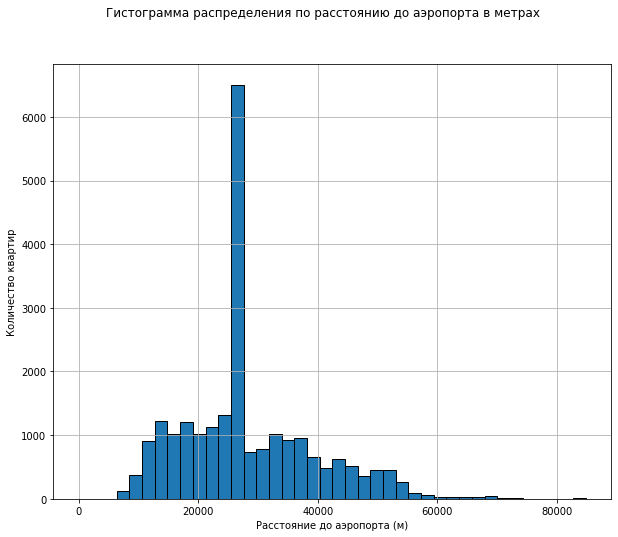

In [142]:
plt.figure(figsize=(10,8))
data['nearest_airport_distance_m'].hist(bins=40, ec='black')
plt.suptitle('Гистограмма распределения по расстоянию до аэропорта в метрах')
plt.xlabel('Расстояние до аэропорта (м)')
plt.ylabel('Количество квартир')
plt.show()

Вычислим статистические данные.

In [143]:
data['nearest_airport_distance_m'].describe().round()

count    23353.0
mean     28333.0
std      11098.0
min          0.0
25%      21137.0
50%      26757.0
75%      34375.0
max      84869.0
Name: nearest_airport_distance_m, dtype: float64

**Наблюдения:** Среднее расстояние до ближайшего аэропорта стоставляет 28333.0 метров, видимо аэропорт находится как это принято за территории города. Что и показывает наш график. Есть квартиры, расположенные рядом с аэропортом, они будут привелектельны, для тех кто часто летает. Есть квартиры, которые очень далеко находятся от аэропорта, возможно на них будет меньший спрос.
Максимальное расстояние составляет 84869.0 метров.

#### Расстояние до ближайшего парка

Построим гистограмму распределения по расстоянию до ближайшего парка.

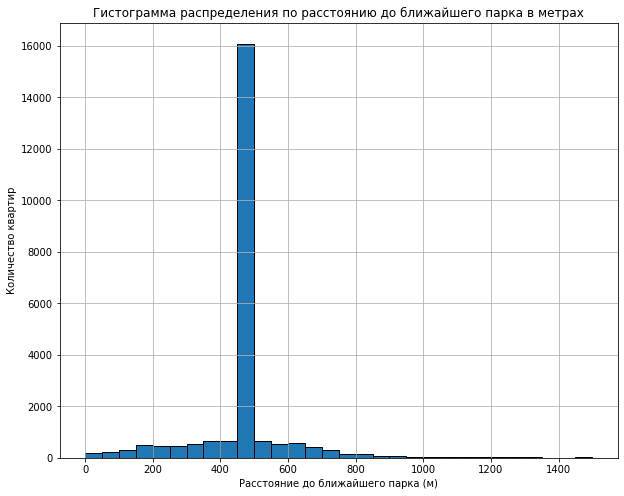

In [144]:
plt.figure(figsize=(10,8))
data['nearest_park_distance_m'].hist(bins=30, range=(0, 1500), ec='black')
plt.title('Гистограмма распределения по расстоянию до ближайшего парка в метрах')
plt.xlabel('Расстояние до ближайшего парка (м)')
plt.ylabel('Количество квартир')
plt.show()

Вычислим статистические данные.

In [145]:
data['nearest_park_distance_m'].describe().round()

count    23353.0
mean       467.0
std        200.0
min          1.0
25%        455.0
50%        455.0
75%        455.0
max       3190.0
Name: nearest_park_distance_m, dtype: float64

**Наблюдения:** Среднее расстояние до ближайшего парка составляет 467.0 метров, что совсем рядом. В принципе все квартиры находятся недалеко от того или иного парка. В среднем, если взять любую квартиру, рядом будет всегда парк. Это правлильно, парки нужны) Максимальное расстояние до ближайшего парка составляет 3190.0 метров.

#### День недели публикации объявления

Построим гистограмму распределения по дню недели публикации объявления.

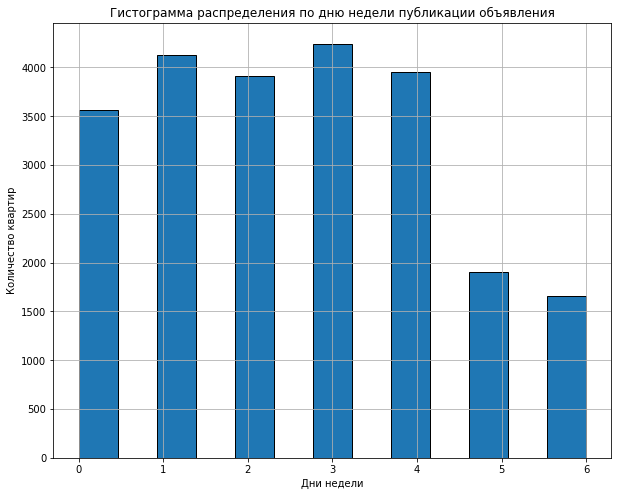

In [146]:
plt.figure(figsize=(10,8))
data['day'].hist(bins=13, range=(0,6), ec='black')
plt.title('Гистограмма распределения по дню недели публикации объявления')
plt.xlabel('Дни недели')
plt.ylabel('Количество квартир')
plt.show()

**Наблюдения:** Исходя из графика видно что на первом месте стоит четверг. Возможно это связано с тем, что на создание и согласование всех условий объявлений уходит три - четыре дня. Следом идет вторник, среда, пятница и понедельник. В выходные дни мало публикуется объявлений.

#### Месяц публикации объявления

Построим гистограмму распределения по месяцу публикации объявления.

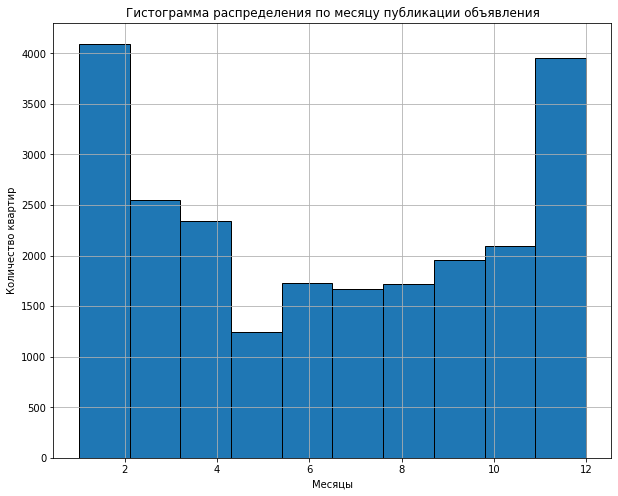

In [147]:
plt.figure(figsize=(10,8))
data['month'].hist(bins=10, range=(1, 12), ec='black')
plt.title('Гистограмма распределения по месяцу публикации объявления')
plt.xlabel('Месяцы')
plt.ylabel('Количество квартир')
plt.show()

**Наблюдения:** Из графика видно, что больше всего публикуется объявлений после нового года и перед новым годом. Возможно это связано, с тем что люди в новом году хотят продать свою квартиру и соответсвенно перед новым годом тоже стремятся продать свою квартиру. В мае месяце видно спад по публикации объявлений.

### Изучим как быстро продавались квартиры

Построим гистограмму по времени продажи квартиры в днях

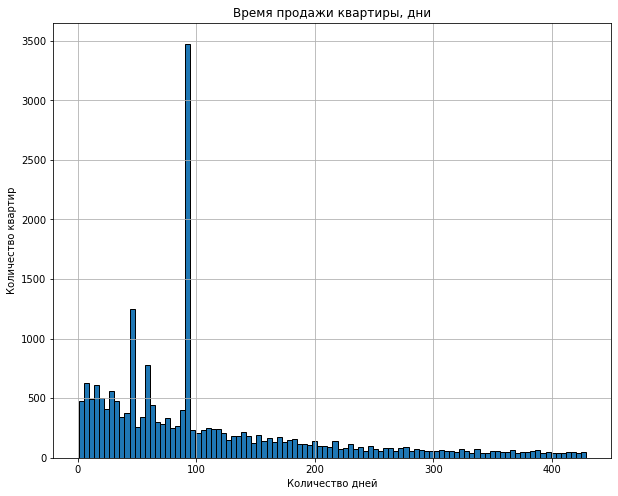

In [148]:
plt.figure(figsize=(10,8))
data['days_exposition'].hist(bins = 100, ec='black')
plt.title('Время продажи квартиры, дни')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

На графике видны выбросы. В какие-то дни квартиры продаются чаще. Рассмотрим поближе этот промежуток.

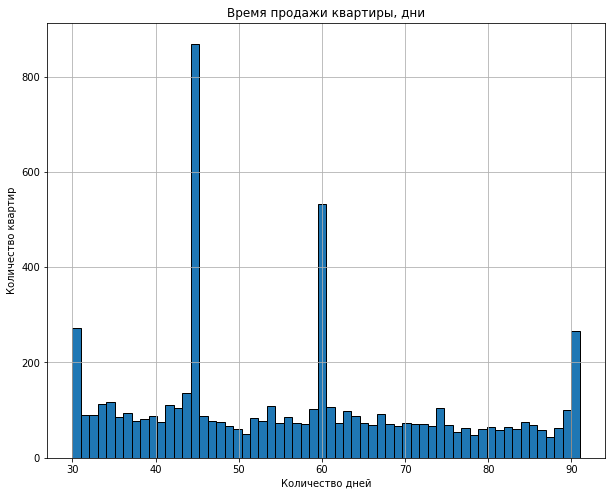

In [149]:
plt.figure(figsize=(10,8))
data['days_exposition'].hist(bins = 60, range=(30, 91), ec='black')
plt.title('Время продажи квартиры, дни')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

Видим, что на 30, 45, 60 и 90 день квартиры продаются чаще, чем в другие дни. Видимо это как-то связано с бизнесс процессами системы.

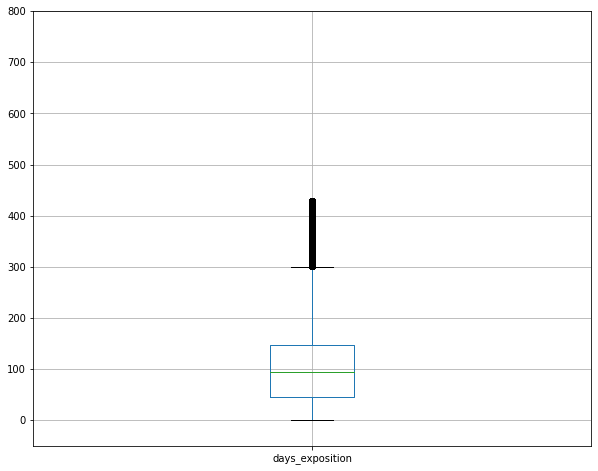

In [150]:
plt.figure(figsize=(10,8))
data.boxplot('days_exposition') 
plt.ylim(-50, 800);

Посчитаем среднее значение и медиану.

In [151]:
data['days_exposition'].describe().round()

count    21049.0
mean       113.0
std         97.0
min          1.0
25%         45.0
50%         95.0
75%        147.0
max        429.0
Name: days_exposition, dtype: float64

 **Вывод:**
Данные о времени продажи также имеют пуассоновское распределение. Среднее значение продажи – 113 дней, медианное – 95. Построив боксплот можем видеть, что 50% всех значений, сосредоточенных между 75 и 25 процентилем находятся между 45 и 147 днями. Продажи до 45 дней можно считать быстрыми, а дольше 147 – долгими. За пределами верхнего хвоста находятся значения выше 400 дней. Эти значения можно отнести скроее к аномально долгим срокам продаж.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

#### Изучим, зависит ли цена от общей площади, жилой площади, площади кухни, количества комнат и даты размещения объявления

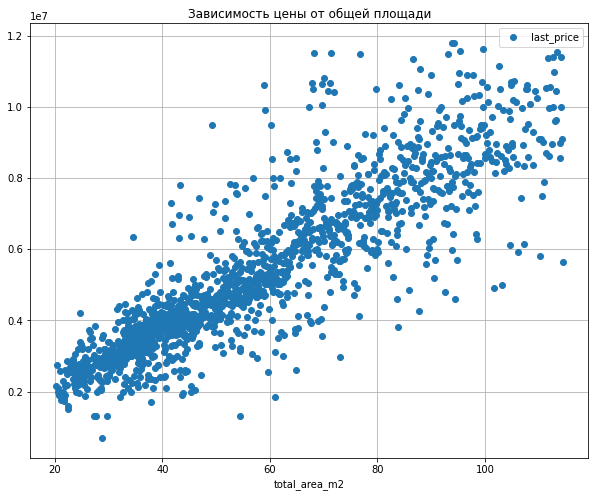

Корреляция цены и общей площади: 

               last_price  total_area_m2
last_price       1.000000       0.904749
total_area_m2    0.904749       1.000000 



In [152]:
(
    data.pivot_table(index='total_area_m2', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 8))
)
plt.title('Зависимость цены от общей площади')
plt.show()

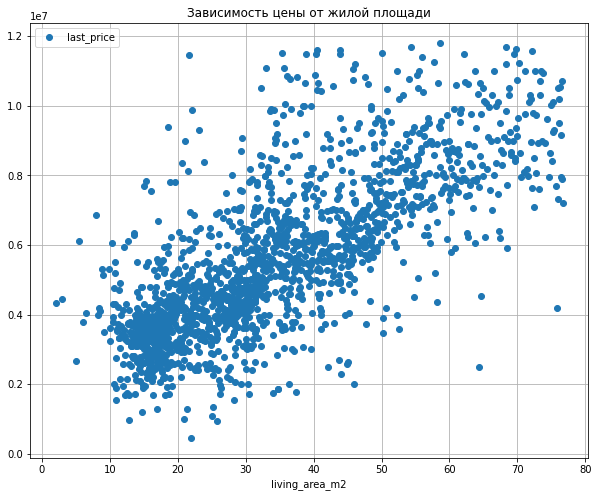

Корреляция цены и жилой площади: 

                last_price  living_area_m2
last_price        1.000000        0.729581
living_area_m2    0.729581        1.000000 



In [153]:
(
    data.pivot_table(index='living_area_m2', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 8))
)
plt.title('Зависимость цены от жилой площади')
plt.show()

Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.

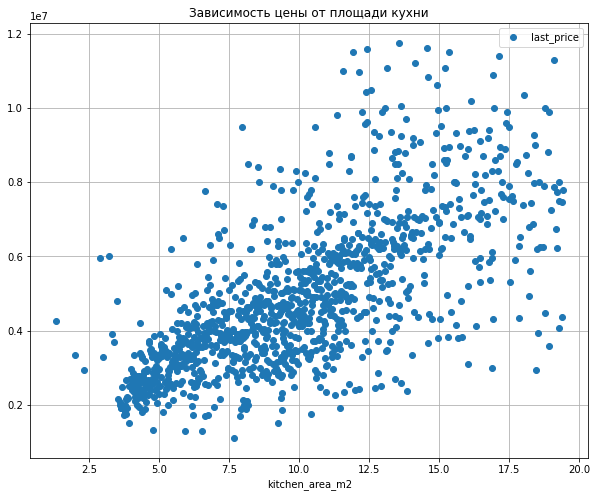

Корреляция цены и площади кухни: 

                 kitchen_area_m2  last_price
kitchen_area_m2         1.000000    0.444163
last_price              0.444163    1.000000 



In [154]:
(
    data.pivot_table(index='kitchen_area_m2', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 8))
)
plt.title('Зависимость цены от площади кухни')
plt.show()

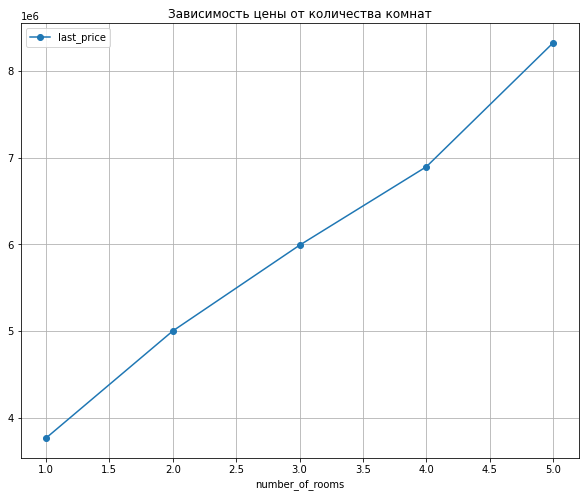

Корреляция цены и числа комнат: 

                 last_price  number_of_rooms
last_price         1.000000         0.535812
number_of_rooms    0.535812         1.000000 



In [155]:
(
    data.query('number_of_rooms > 0').pivot_table(index='number_of_rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 8))
)
plt.title('Зависимость цены от количества комнат')
plt.show()

Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади.

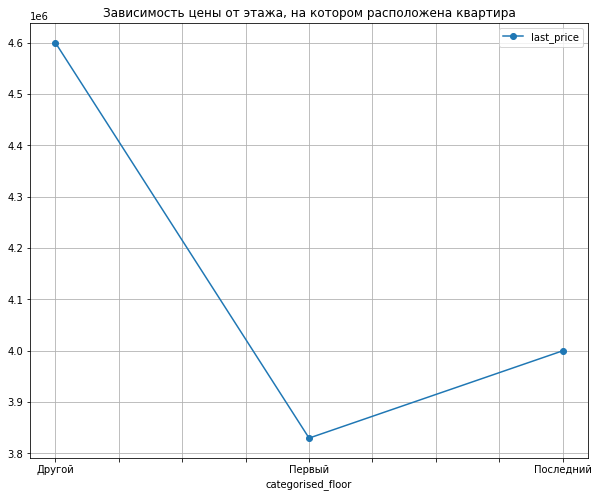

In [156]:
(
    data.pivot_table(index='categorised_floor', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(10, 8))
)
plt.title('Зависимость цены от этажа, на котором расположена квартира')
plt.show()

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

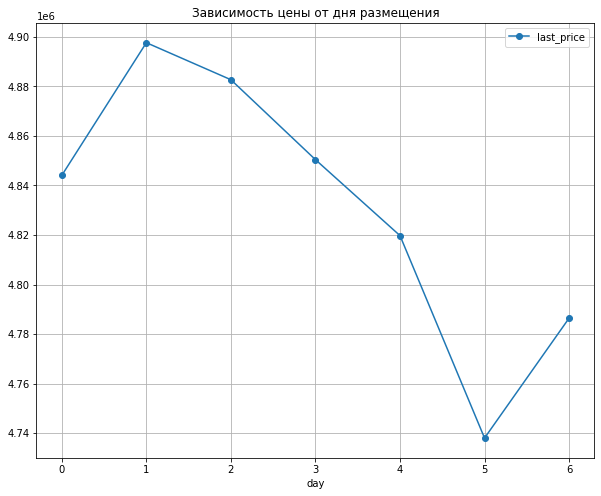

In [157]:
(
    data.pivot_table(index='day', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 8))
)
plt.title('Зависимость цены от дня размещения')
plt.show()

Квартиры, чьи объявления были выставлены во вторник продавались дороже, чем квартиры, которые были выставлены в субботу. Видна тенденция на спад продаж квартир, которые выставляются в среду, четверг и пятницу.

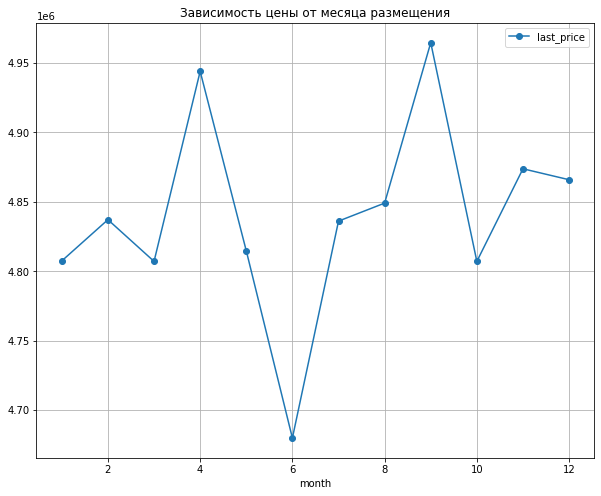

In [158]:
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 8))
)
plt.title('Зависимость цены от месяца размещения')
plt.show()

Стоимсоть квартир выставленных в период с начала года и до марта месяца продавались почти по одинаковой цене. Самые продажные месяца оказались апрель и сентябрь. Месяц июнь показывает, что летом стоимость квартир самая дешевая. Под конец года ситуация нормализуется.

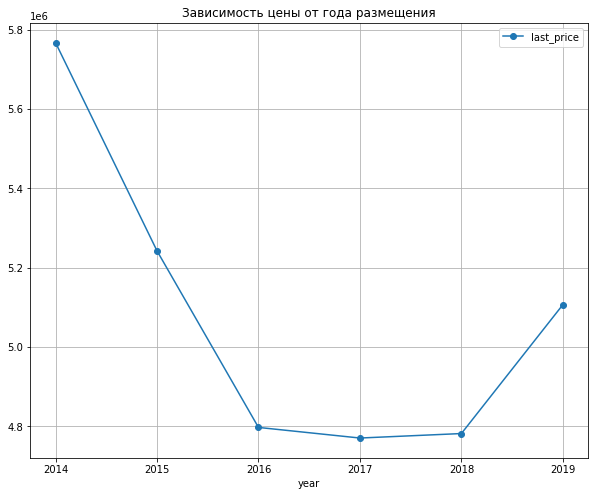

In [159]:
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 8))
)
plt.title('Зависимость цены от года размещения')
plt.show()

Самые высокие уены на квартиры были в 2014 году, после 2014 года идет резкий спад на стоимость квартир. В период с 2016 по 2018 стоимость квартир не росла и оставалась на одинаковом низком уровне. После 2018 года начинается подъем стоимости квартир и продолжается до 2019 года.

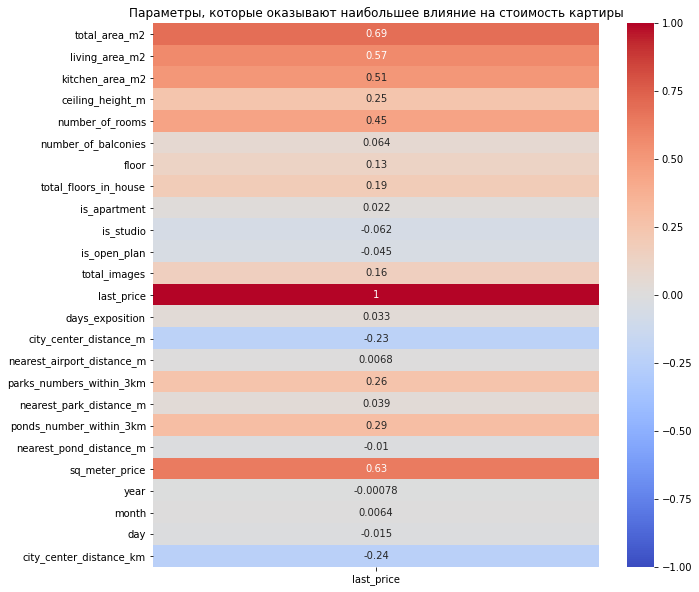

In [160]:
plt.figure(figsize=(10,10))
upp_mat = np.triu(data.corr())
sns.heatmap(data.corr()[['last_price']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.title('Параметры, которые оказывают наибольшее влияние на стоимость картиры')
plt.show()

Наибольшее влияние на цену жилья оказывает метраж (и связанные с ним жилая площадь и площадь кухни), далее идет количество комнат. Ну и следовательно стоимость квадратного метра.

Создадим функцию для подсчета среднего и медианы, которая построит нам графики.

In [161]:
def cat_corr(ind):
    floor_corr = data.pivot_table(index=ind,values='last_price',aggfunc=['mean','median'])
    floor_corr.columns = ['Среднее','Медиана']
    floor_corr.plot(style='o-', grid=True, figsize=(10, 8))
    plt.title('Зависимость среднего значения и медианы')
    plt.xticks(fontsize=8)

Применим нашу функцию отношению к этажу на котором находится квартира.

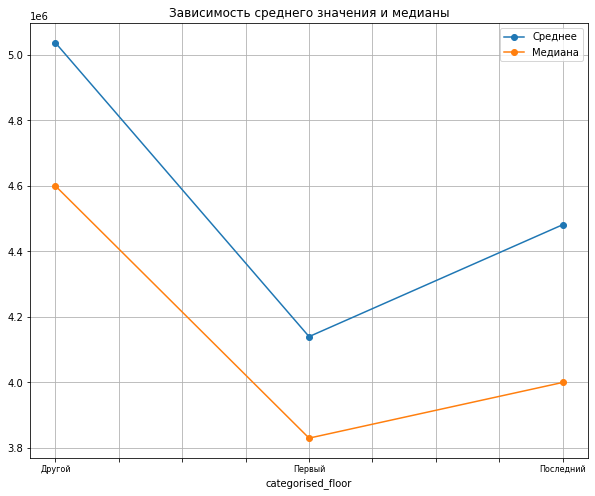

In [162]:
cat_corr('categorised_floor')

**Вывод:** Медиана и среднее по ценам на квартиры на первом этаже ниже чем на последнем, а на последнем ниже, чем на любом, кроме первого. Зависимость все таки есть.

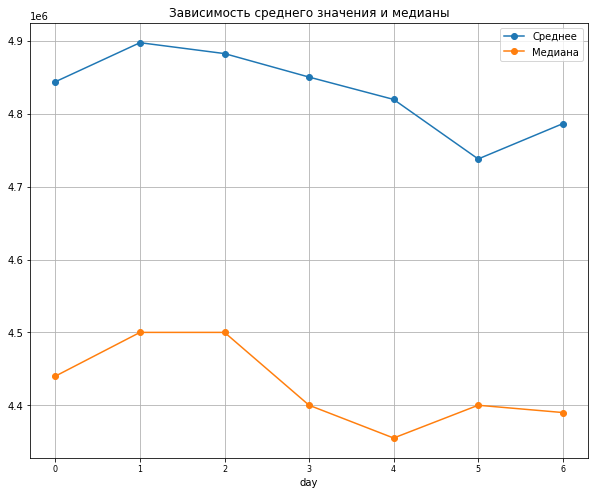

In [163]:
cat_corr('day')

**Вывод:** В первые два дня значения и среднего и медианы похожи. После среды оба значения идут на спад. В пятницу значение медианы самое низкое. А самое низкое значение для среднего это получается суббота. В Воскресенье среднее значение начинает расти, в то время как медиана на одном и том же уровне.

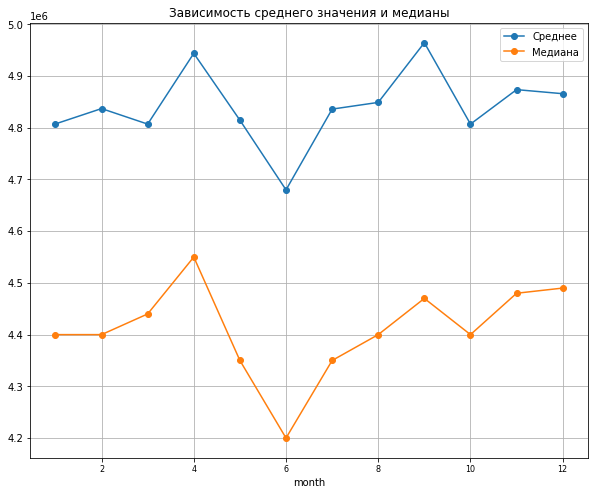

In [164]:
cat_corr('month')

**Вывод:** Заметно как в начале года идет рост. Самое высокое значение медианы это месяц апрель, после него идет резкий спад до самого минимального значения в июне. В среднем значении также в апреле месяце наблюдается рости и одна из максимальных точек, после чего идет резкий спад до самой низкой точки в июне месяце. После июня месяца наблюдается рост значений как и у среднего, так и у медианы. Причем самая высокая точка по среднему значению это месяц сентябрь, после чего до конца года ситуация стабилизируется и стоимость держится на относительно одном уровне. Значение медианы малыми шагами начинает расти начиная с августа месяца.

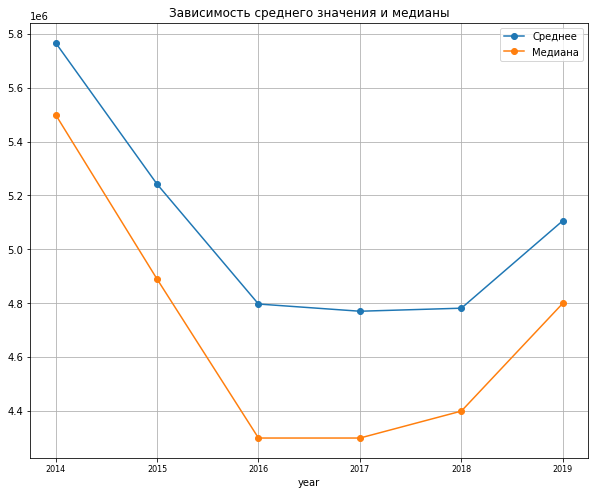

In [165]:
cat_corr('year')

**Вывод:** С 2014 до 2018 года недвижимость заметно дешевела. Зависимость отчетливо видна. После 2018 года виднее рост стоимости.

In [166]:
days_stat = data.pivot_table(    
    index='year', 
    values='days_exposition', 
    aggfunc= ('median','mean')
).fillna(0).reset_index()

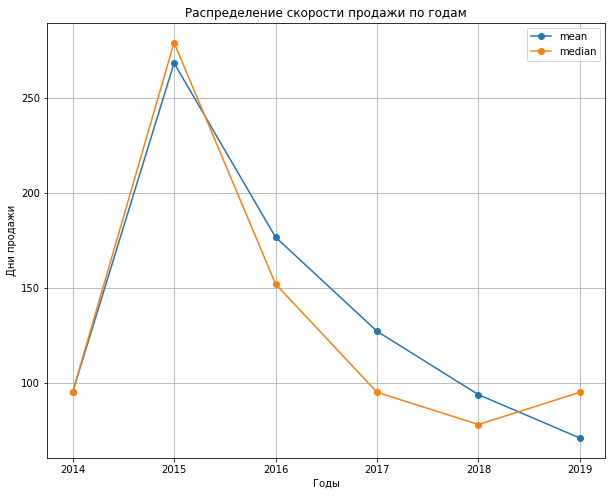

In [167]:
days_stat.plot(x='year',style='o-', grid=True, figsize=(10, 8)) 
plt.xlabel('Годы')
plt.ylabel('Дни продажи')
plt.title('Распределение скорости продажи по годам')
plt.show()

Скорость продажи недвижимости с каждым годом становится все меньше и меньше, как по среднему значению, так и по медиане. Разрыв по дням продажи в 2015 году и 2019 составляет больше чем в два раза. Это говорит о том, что с развитием новых сервисов как Яндекс недвижимость, можно судить о том, что эти сервисы реально помогают в убыстрении продажи квартиры. Тем самым облегчая жизнь как продавцам, так и покупателям недвижимости.

In [168]:
total_area_stat = data.pivot_table(    
    index='year', 
    values='total_area_m2', 
    aggfunc= ('median','mean')
).fillna(0).reset_index()

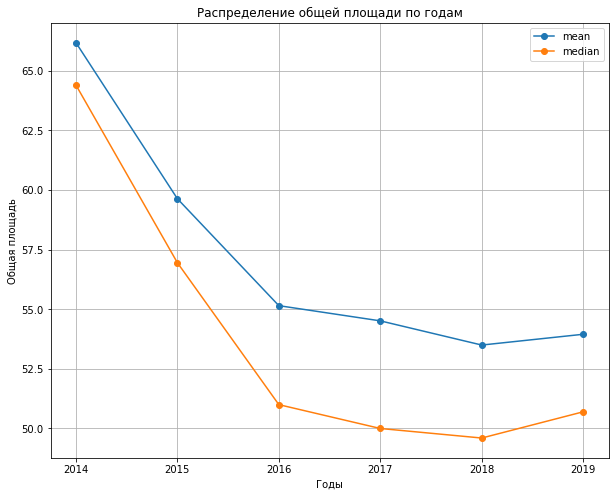

In [169]:
total_area_stat.plot(x='year',style='o-', grid=True, figsize=(10, 8)) 
plt.xlabel('Годы')
plt.ylabel('Общая площадь')
plt.title('Распределение общей площади по годам')
plt.show()

Как мы видим стоимость недвижимости снижается, потому что снижается и общая площадь продаваемой недвижимости  начиная с 2014 года и вплоть до 2017. Средняя и медиана стоимости недвижимости снижается из года в год. 

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Выведем зависимость и посчитаем среднюю цену за квадратный метр в 10 населённых пунктах с наибольшим числом объявлений.

In [170]:
pivot_data = data.pivot_table(index='locality_unduplicated', values='sq_meter_price', aggfunc=['count', 'mean']).reset_index().round()
pivot_data.columns = ['Название населенного пункта', 'Количество объявлений', 'Средняя цена за кв. м.'] 
pivot_data = pivot_data.sort_values('Количество объявлений', ascending=False).head(10)
pivot_data.sort_values('Средняя цена за кв. м.', ascending=False)

,Название населенного пункта,Количество объявлений,Средняя цена за кв. м.
226,санкт-петербург,13432,105556.0
201,пушкин,335,100405.0
107,кудрово,462,95061.0
168,парголово,325,90292.0
145,мурино,573,85826.0
304,шушары,434,78551.0
88,колпино,334,75278.0
41,гатчина,299,68540.0
33,всеволожск,385,67146.0
34,выборг,225,58395.0


**Вывод:** Выделим, что высокая стоимость за квадратный метр это в городе Санкт-Петербург, что логично. А самая низкая стоимость за квадратный метр в городе Выборг, что очень интересно.

In [171]:
def town_status(row):
    if row['locality_unduplicated'] == 'санкт-петербург':
        return 'Питер'
    else:
        return 'За Питером'

In [172]:
data['town_status'] = data.apply(town_status, axis=1)

In [173]:
top_10_data = data.groupby('locality_unduplicated')\
    .agg({'town_status':'count','sq_meter_price':'mean'})
top_10_data = top_10_data.sort_values('town_status', ascending=False).head(10)

In [174]:
top_10_data.sort_values('sq_meter_price', ascending=False).head(11).round()

,town_status,sq_meter_price
locality_unduplicated,,
санкт-петербург,15519,105556.0
пушкин,368,100405.0
кудрово,464,95061.0
парголово,326,90292.0
мурино,573,85826.0
шушары,437,78551.0
колпино,337,75278.0
гатчина,303,68540.0
всеволожск,389,67146.0


Text(0.5, 1.0, 'Рейтинг ТОП-10 по средней стоимости за кв. метр ')

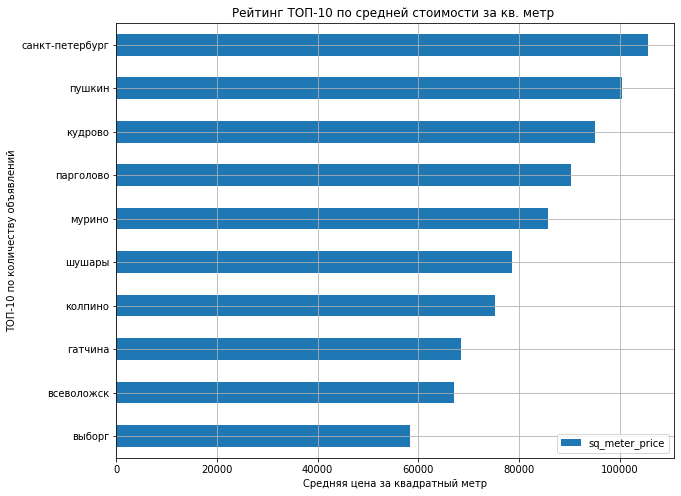

In [175]:
top_10_data.sort_values('sq_meter_price', ascending=True)\
    .drop('town_status', axis=1).plot(kind='barh', grid=True, figsize=(10, 8))
plt.xlabel('Средняя цена за квадратный метр')
plt.ylabel('ТОП-10 по количеству объявлений')
plt.title('Рейтинг ТОП-10 по средней стоимости за кв. метр ')

### Выделим квартиры в Санкт-Петербурге и посчитаем среднюю цену каждого километра

In [176]:
spb_data = data.query('locality_unduplicated == "санкт-петербург"')
spb_data['city_center_distance_km'].value_counts().sort_values()

27       2
29       3
26       3
28      10
24      22
23      30
25      64
19      81
0       83
20      83
22     139
18     172
21     193
1      235
2      304
7      404
6      468
3      518
17     520
8      660
9      682
5      758
4      893
10     907
16    1097
15    1358
11    1400
13    1443
14    1488
12    1499
Name: city_center_distance_km, dtype: int64

Видно, что объявлений дальше 24 км от центра когора уже мало и расчеты на основе 2-3 наблюдений будут неточными. Отбросим все наблюдения дальше 24 км от центра и будем работать с отставшимися.

,city_center_distance_km,last_price,sq_meter_price
0,0,8487952.0,121967.0
1,1,8155160.0,116313.0
2,2,7689775.0,113922.0
3,3,7443240.0,111065.0
4,4,7778959.0,120047.0
5,5,7381625.0,121296.0
6,6,6796394.0,119336.0
7,7,6697777.0,117976.0
8,8,6243339.0,111752.0
9,9,5321504.0,105637.0


<AxesSubplot:label='5b1c1863-adc8-49a3-949d-d8e5b69a00b8'>

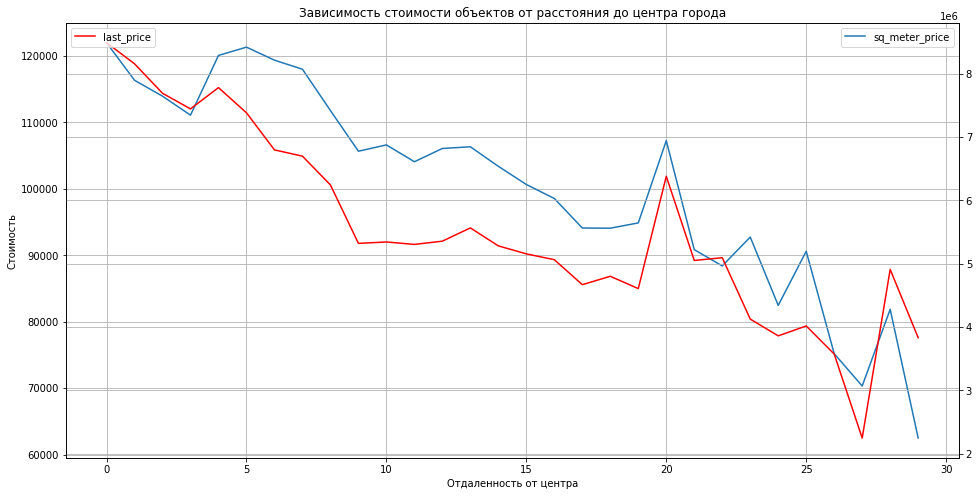

In [178]:
center_spb_price = spb_data.groupby('city_center_distance_km', as_index=False).agg({'last_price':'mean',\
                                                                                    'sq_meter_price':'mean'}).round()
display(center_spb_price)
sq_meter_plot = center_spb_price['sq_meter_price'].plot(grid=True, figsize=(16, 6), legend= True);
plt.title('Зависимость стоимости объектов от расстояния до центра города')
plt.xlabel('Отдаленность от центра')
plt.ylabel('Стоимость')
display(center_spb_price[['last_price']].plot(grid=True, figsize=(16, 8),\
                                              ax = sq_meter_plot.twinx(), color='red', legend = True));

plt.legend(loc='upper left');

**Вывод:**
По мере приближения к центру цена и квадратного метра и жилья в целом возрастают. Это вполне объяснимо – наверняка корреляция стоимости жилья и квадратного метра очень высока. Так же можем заметить, что на промежутке от 10 км от центра до центра Санкт-Петербурга график растет особенно резко. К сравнению на промежутке от 10 до 24 км удаленности от центра такого резкого роста не наблюдается.

In [179]:
center_spb_price.query('city_center_distance_km == 27')

,city_center_distance_km,last_price,sq_meter_price
27,27,2250000.0,70312.0


In [180]:
data.query('city_center_distance_km == 27')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price,year,month,day,categorised_floor,city_center_distance_km,town_status
86,поселок металлострой,63.0,36.0,9.0,2.65,2.0,2,3,11,False,...,0,503,металлострой,71428.6,2018,7,1,Другой,27,За Питером
556,пушкин,28.5,16.0,5.0,2.50,1.0,1,4,5,False,...,0,503,пушкин,122807.0,2018,6,2,Другой,27,За Питером
558,поселок металлострой,65.5,42.0,8.0,2.60,3.0,2,7,10,False,...,0,503,металлострой,68702.3,2017,10,4,Другой,27,За Питером
670,поселок александровская,NaN,NaN,16.0,2.77,4.0,1,4,16,False,...,1,914,александровская,NaN,2017,8,1,Другой,27,За Питером
748,санкт-петербург,74.0,30.0,NaN,NaN,2.0,0,3,5,False,...,0,503,санкт-петербург,NaN,2017,11,1,Другой,27,Питер
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22544,красное село,37.0,14.0,10.0,2.65,1.0,1,4,12,False,...,1,986,красное село,81081.1,2015,12,4,Другой,27,За Питером
22607,поселок металлострой,48.6,27.4,8.2,2.65,2.0,0,3,9,False,...,0,503,металлострой,77983.5,2018,3,0,Другой,27,За Питером
22619,пушкин,50.0,39.0,6.0,2.50,3.0,0,9,9,False,...,0,503,пушкин,120000.0,2018,9,1,Последний,27,За Питером
23316,пушкин,39.4,16.0,11.4,NaN,1.0,1,2,5,False,...,1,450,пушкин,159898.5,2016,5,0,Другой,27,За Питером


In [181]:
data.query('city_center_distance_km == 27 and locality_name == "санкт-петербург"')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price,year,month,day,categorised_floor,city_center_distance_km,town_status
748,санкт-петербург,74.0,30.0,NaN,NaN,2.0,0,3,5,False,...,0,503,санкт-петербург,NaN,2017,11,1,Другой,27,Питер
5961,санкт-петербург,32.0,16.5,7.0,2.65,1.0,0,2,2,False,...,0,503,санкт-петербург,70312.5,2018,2,1,Последний,27,Питер


Строка 748 и строка 5961 выбиваются из таблицы. Так как у них расстояние до центра указано 27 километров и при этом стоит город Санкт-Петербург. Вот они нам и портят график.

In [182]:
data.query('city_center_distance_km == 3 and categorised_floor == "Первый"')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price,year,month,day,categorised_floor,city_center_distance_km,town_status
181,санкт-петербург,71.8,38.70,12.00,NaN,3.0,0,1,5,False,...,1,585,санкт-петербург,110027.9,2017,8,2,Первый,3,Питер
969,санкт-петербург,41.2,27.30,7.50,2.80,2.0,0,1,6,False,...,1,886,санкт-петербург,129854.4,2017,11,3,Первый,3,Питер
1108,санкт-петербург,47.0,27.60,8.60,2.65,2.0,0,1,3,False,...,3,69,санкт-петербург,86170.2,2015,11,4,Первый,3,Питер
1210,санкт-петербург,29.8,21.40,7.10,2.85,1.0,0,1,4,False,...,0,503,санкт-петербург,152684.6,2019,3,4,Первый,3,Питер
2387,санкт-петербург,90.0,50.70,14.50,NaN,3.0,0,1,5,False,...,1,692,санкт-петербург,127777.8,2019,4,1,Первый,3,Питер
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22563,санкт-петербург,56.2,40.61,7.15,2.65,3.0,0,1,5,False,...,3,85,санкт-петербург,88968.0,2015,11,1,Первый,3,Питер
22886,санкт-петербург,34.0,15.40,7.00,NaN,1.0,0,1,5,False,...,1,1077,санкт-петербург,123529.4,2018,8,0,Первый,3,Питер
23001,санкт-петербург,64.9,50.90,5.30,NaN,3.0,0,1,4,False,...,3,100,санкт-петербург,89368.3,2017,5,0,Первый,3,Питер
23178,санкт-петербург,60.0,42.00,8.00,2.80,3.0,0,1,5,False,...,0,503,санкт-петербург,99166.7,2018,2,3,Первый,3,Питер


In [183]:
data.query('city_center_distance_km == 3 and categorised_floor == "Последний"')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price,year,month,day,categorised_floor,city_center_distance_km,town_status
483,санкт-петербург,70.00,40.000000,NaN,NaN,2.0,0,6,6,False,...,1,701,санкт-петербург,142857.1,2018,2,2,Последний,3,Питер
486,санкт-петербург,73.00,49.000000,12.785637,2.65,2.0,0,4,4,False,...,1,638,санкт-петербург,91095.9,2015,8,3,Последний,3,Питер
546,санкт-петербург,25.00,14.274492,4.378643,NaN,1.0,0,5,5,False,...,1,776,санкт-петербург,240000.0,2018,11,4,Последний,3,Питер
648,санкт-петербург,NaN,NaN,13.300000,NaN,NaN,0,7,7,False,...,0,503,санкт-петербург,NaN,2018,7,6,Последний,3,Питер
661,санкт-петербург,69.75,43.300000,9.400000,NaN,3.0,0,4,4,False,...,0,503,санкт-петербург,103225.8,2017,11,4,Последний,3,Питер
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21891,санкт-петербург,37.65,24.300000,5.200000,NaN,2.0,0,3,3,False,...,3,182,санкт-петербург,114209.8,2017,12,1,Последний,3,Питер
22152,санкт-петербург,71.10,40.596654,12.452860,2.65,2.0,0,4,4,False,...,1,777,санкт-петербург,NaN,2019,4,4,Последний,3,Питер
23244,санкт-петербург,37.90,17.000000,9.400000,2.65,1.0,0,4,4,False,...,0,503,санкт-петербург,98944.6,2018,11,2,Последний,3,Питер
23427,санкт-петербург,104.00,69.000000,13.900000,NaN,5.0,0,7,7,False,...,1,569,санкт-петербург,73076.9,2017,11,1,Последний,3,Питер


In [184]:
data.query('city_center_distance_km == 3 and categorised_floor == "Другой"')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price,year,month,day,categorised_floor,city_center_distance_km,town_status
35,санкт-петербург,NaN,NaN,17.0,2.65,5.0,0,4,5,False,...,1,779,санкт-петербург,NaN,2017,6,0,Другой,3,Питер
136,санкт-петербург,51.8,25.6,7.3,NaN,2.0,1,2,6,False,...,1,812,санкт-петербург,125482.6,2018,8,2,Другой,3,Питер
154,санкт-петербург,80.0,44.2,12.2,NaN,3.0,0,2,3,False,...,1,838,санкт-петербург,102500.0,2018,11,1,Другой,3,Питер
201,санкт-петербург,NaN,NaN,11.0,NaN,NaN,0,2,5,False,...,0,503,санкт-петербург,NaN,2015,11,3,Другой,3,Питер
315,санкт-петербург,108.0,NaN,11.2,2.65,4.0,0,2,6,False,...,0,503,санкт-петербург,NaN,2018,9,5,Другой,3,Питер
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23217,санкт-петербург,64.0,37.0,8.0,2.65,3.0,1,2,6,False,...,1,928,санкт-петербург,116406.2,2018,2,3,Другой,3,Питер
23338,санкт-петербург,73.9,40.9,11.4,NaN,3.0,0,5,6,False,...,1,110,санкт-петербург,85926.9,2018,8,1,Другой,3,Питер
23449,санкт-петербург,52.6,29.8,8.7,NaN,3.0,0,2,5,False,...,3,69,санкт-петербург,119771.9,2015,5,3,Другой,3,Питер
23521,санкт-петербург,65.0,44.0,15.3,2.65,2.0,0,2,4,False,...,0,503,санкт-петербург,130769.2,2018,11,3,Другой,3,Питер


In [185]:
data.query('city_center_distance_km == 5 and categorised_floor == "Первый"')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price,year,month,day,categorised_floor,city_center_distance_km,town_status
1246,санкт-петербург,74.0,42.252495,7.000000,2.65,3.0,0,1,5,False,...,3,732,санкт-петербург,89054.1,2018,2,4,Первый,5,Питер
1262,санкт-петербург,44.0,28.000000,7.000000,2.65,1.0,0,1,6,False,...,0,503,санкт-петербург,90909.1,2017,10,1,Первый,5,Питер
2230,санкт-петербург,36.0,25.000000,6.000000,2.75,2.0,0,1,3,False,...,0,503,санкт-петербург,186111.1,2018,11,4,Первый,5,Питер
2356,санкт-петербург,NaN,42.000000,NaN,2.65,3.0,0,1,9,False,...,1,283,санкт-петербург,NaN,2016,6,4,Первый,5,Питер
2426,санкт-петербург,101.4,63.400000,17.759775,NaN,5.0,0,1,5,False,...,0,503,санкт-петербург,83826.4,2017,5,3,Первый,5,Питер
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22516,санкт-петербург,45.5,29.500000,5.500000,2.65,2.0,0,1,5,False,...,2,212,санкт-петербург,102197.8,2017,11,4,Первый,5,Питер
22673,санкт-петербург,31.0,17.700000,6.400000,2.50,1.0,0,1,5,False,...,0,503,санкт-петербург,103225.8,2017,2,0,Первый,5,Питер
22814,санкт-петербург,33.0,12.000000,8.000000,NaN,1.0,0,1,6,False,...,1,584,санкт-петербург,172121.2,2019,1,3,Первый,5,Питер
23113,санкт-петербург,93.0,73.000000,10.000000,NaN,4.0,1,1,3,False,...,0,503,санкт-петербург,87096.8,2017,6,6,Первый,5,Питер


In [186]:
data.query('city_center_distance_km == 5 and categorised_floor == "Последний"')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price,year,month,day,categorised_floor,city_center_distance_km,town_status
141,санкт-петербург,32.6,18.5,5.5,2.65,1.0,0,5,5,False,...,0,503,санкт-петербург,199386.5,2019,2,2,Последний,5,Питер
368,санкт-петербург,85.0,56.5,NaN,NaN,3.0,0,6,6,False,...,1,36,санкт-петербург,NaN,2018,9,4,Последний,5,Питер
824,санкт-петербург,NaN,NaN,NaN,NaN,5.0,0,3,3,False,...,2,519,санкт-петербург,NaN,2018,11,1,Последний,5,Питер
1281,санкт-петербург,68.6,35.0,15.0,NaN,2.0,2,8,8,False,...,0,503,санкт-петербург,155976.7,2017,6,5,Последний,5,Питер
1314,санкт-петербург,31.4,16.1,5.5,2.65,1.0,0,5,5,False,...,1,447,санкт-петербург,113057.3,2017,9,4,Последний,5,Питер
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22687,санкт-петербург,74.8,40.0,18.0,NaN,2.0,0,7,7,False,...,0,503,санкт-петербург,86898.4,2018,6,0,Последний,5,Питер
23424,санкт-петербург,80.0,44.6,10.0,2.65,2.0,0,5,5,False,...,1,974,санкт-петербург,106250.0,2018,2,3,Последний,5,Питер
23536,санкт-петербург,70.0,44.4,9.0,2.65,3.0,0,4,4,False,...,0,503,санкт-петербург,86857.1,2018,10,4,Последний,5,Питер
23574,санкт-петербург,NaN,3.0,16.0,NaN,3.0,1,8,8,False,...,3,100,санкт-петербург,NaN,2015,11,1,Последний,5,Питер


In [187]:
data.query('city_center_distance_km == 5 and categorised_floor == "Другой"')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price,year,month,day,categorised_floor,city_center_distance_km,town_status
106,санкт-петербург,NaN,NaN,NaN,NaN,5.0,0,3,4,False,...,0,503,санкт-петербург,NaN,2017,5,3,Другой,5,Питер
114,санкт-петербург,21.4,8.300000,6.300000,NaN,1.0,0,7,8,False,...,1,286,санкт-петербург,186915.9,2019,2,3,Другой,5,Питер
234,санкт-петербург,57.0,33.000000,8.000000,2.65,2.0,0,3,5,False,...,0,503,санкт-петербург,137193.0,2019,4,3,Другой,5,Питер
276,санкт-петербург,108.4,61.894196,18.985795,NaN,3.0,0,6,7,False,...,1,678,санкт-петербург,NaN,2018,11,3,Другой,5,Питер
318,санкт-петербург,67.0,37.000000,17.000000,2.84,1.0,1,7,9,False,...,1,713,санкт-петербург,149104.5,2017,7,0,Другой,5,Питер
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23448,санкт-петербург,NaN,NaN,NaN,NaN,NaN,0,5,6,False,...,2,616,санкт-петербург,NaN,2018,2,3,Другой,5,Питер
23473,санкт-петербург,60.0,40.300000,8.000000,2.65,2.0,0,2,4,False,...,1,670,санкт-петербург,108333.3,2018,12,4,Другой,5,Питер
23511,санкт-петербург,42.5,27.600000,7.443693,2.70,1.0,2,3,10,False,...,2,474,санкт-петербург,112470.6,2016,4,1,Другой,5,Питер
23588,санкт-петербург,69.0,39.397597,10.000000,2.65,2.0,2,8,10,False,...,1,874,санкт-петербург,117391.3,2015,10,2,Другой,5,Питер


In [188]:
data.query('city_center_distance_km == 5')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price,year,month,day,categorised_floor,city_center_distance_km,town_status
106,санкт-петербург,NaN,NaN,NaN,NaN,5.0,0,3,4,False,...,0,503,санкт-петербург,NaN,2017,5,3,Другой,5,Питер
114,санкт-петербург,21.4,8.300000,6.300000,NaN,1.0,0,7,8,False,...,1,286,санкт-петербург,186915.9,2019,2,3,Другой,5,Питер
141,санкт-петербург,32.6,18.500000,5.500000,2.65,1.0,0,5,5,False,...,0,503,санкт-петербург,199386.5,2019,2,2,Последний,5,Питер
234,санкт-петербург,57.0,33.000000,8.000000,2.65,2.0,0,3,5,False,...,0,503,санкт-петербург,137193.0,2019,4,3,Другой,5,Питер
276,санкт-петербург,108.4,61.894196,18.985795,NaN,3.0,0,6,7,False,...,1,678,санкт-петербург,NaN,2018,11,3,Другой,5,Питер
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23536,санкт-петербург,70.0,44.400000,9.000000,2.65,3.0,0,4,4,False,...,0,503,санкт-петербург,86857.1,2018,10,4,Последний,5,Питер
23574,санкт-петербург,NaN,3.000000,16.000000,NaN,3.0,1,8,8,False,...,3,100,санкт-петербург,NaN,2015,11,1,Последний,5,Питер
23588,санкт-петербург,69.0,39.397597,10.000000,2.65,2.0,2,8,10,False,...,1,874,санкт-петербург,117391.3,2015,10,2,Другой,5,Питер
23625,санкт-петербург,42.0,24.000000,6.100000,2.70,2.0,0,5,5,False,...,1,837,санкт-петербург,159523.8,2019,2,2,Последний,5,Питер


In [189]:
data.query('city_center_distance_km == 3')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,ponds_number_within_3km,nearest_pond_distance_m,locality_unduplicated,sq_meter_price,year,month,day,categorised_floor,city_center_distance_km,town_status
35,санкт-петербург,NaN,NaN,17.0,2.65,5.0,0,4,5,False,...,1,779,санкт-петербург,NaN,2017,6,0,Другой,3,Питер
136,санкт-петербург,51.8,25.6,7.3,NaN,2.0,1,2,6,False,...,1,812,санкт-петербург,125482.6,2018,8,2,Другой,3,Питер
154,санкт-петербург,80.0,44.2,12.2,NaN,3.0,0,2,3,False,...,1,838,санкт-петербург,102500.0,2018,11,1,Другой,3,Питер
181,санкт-петербург,71.8,38.7,12.0,NaN,3.0,0,1,5,False,...,1,585,санкт-петербург,110027.9,2017,8,2,Первый,3,Питер
201,санкт-петербург,NaN,NaN,11.0,NaN,NaN,0,2,5,False,...,0,503,санкт-петербург,NaN,2015,11,3,Другой,3,Питер
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23430,санкт-петербург,38.0,16.0,12.0,NaN,1.0,0,1,5,False,...,1,466,санкт-петербург,138421.1,2018,11,1,Первый,3,Питер
23449,санкт-петербург,52.6,29.8,8.7,NaN,3.0,0,2,5,False,...,3,69,санкт-петербург,119771.9,2015,5,3,Другой,3,Питер
23521,санкт-петербург,65.0,44.0,15.3,2.65,2.0,0,2,4,False,...,0,503,санкт-петербург,130769.2,2018,11,3,Другой,3,Питер
23555,санкт-петербург,NaN,57.4,12.4,NaN,NaN,1,7,7,False,...,0,503,санкт-петербург,NaN,2019,3,3,Последний,3,Питер


Получается на 3-м километре:
   - Квартир с первым этажом - 69
   - Квартир с последним этажом - 110
   - Квартир с другим этажом - 339
   - Всего квартир - 518
   
Получается на 5-м километре:
   - Квартир с первым этажом - 76
   - Квартир с последним этажом - 117
   - Квартир с другим этажом - 565
   - Всего квартир - 758
   
Пик на 5-м километре обоснован тем, что там больше объявлений то есть 758 по сравнению с 3-м километром против 518. Эта разница в 240 квартир и дает нам пик и провал соответсвенно.

In [190]:
# способы группировки и сортировки информации

(
    data
     .query('3 <= city_center_distance_km <=5 and locality_name == "санкт-петербург"')
     .groupby(['city_center_distance_km', 'categorised_floor'])['last_price']
     .agg(['count', 'mean'])
     .style.format("{:,.0f}")
)

## Общий вывод

Задача проекта — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

За время проекта мы сделали предобработку данных, нашли пропуски, поменяли типы данных, добавили новые столбцы с данными. Провели глубокий анализ всех параметров и данных.
Пришли к финальному выводу.

***Факторы которые наиболее сильно влияют на цену недвижимости:***
- **Общая площадь** - Чем больше площадь квартиры, тем выше цена
- **Количество комнат** - Чем больше комнат, тем выше цена
- **Цена за квадратный метр** - Чем больше цена за квадратный метр, тем выше цена соответсвенно
- **Этаж** - На первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле чем на остальных
- **Удаленность от центра** - Чем ближе к центру, тем дороже квартира. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем на более удаленных
- **День размещения объявления** - Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные
- **Месяц размещения объявления** - Квартиры, размещенные к продаже в летние месяцы и в октябре, в среднем дешевле, чем размещенные в любые другие месяца. В начале и в конце года цены стабильные и высокие
- **Год размещения объявления** - Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры (кризис). 2019г. - рецессия экономики - цены пошли вверх впервые после наступления кризиса

Мы проверили влияние удаленности от центра на стоимость общей площади и квадратного метра жилья для Санкт-Петербурга в радиусе 29 км и получили следующую информацию: цены плавно возрастают на промежутке от 29 до 20 км и находятся в диапазоне от 62 тыс до 107 тыс за квадратный метр. Далее рост становится более резким и в радиусе 10 км цена за кв. метр жилья варьируется от 106 до 121 тыс. за кв. метр жилья. Отсюда следует, что квартиры в центре Питера (в радиусе 10 км) значительно дороже.

Среднее время продажи недвижимости находится в промежутке от 45 до 147 дней – в этот временной промежуток удается продать 50% объектов. Все, что выше или ниже этих временных пределов можно считать уже долгими или быстрыми сделками.

Самая дорогая недвижимость находится в Питере – цена за квадратный метр жилья там самая выскокая – около 122 тыс. за кв. метр. Но стоит учитывать отдаленность от центра города, т.к. в радиусе 10 км цена за квадратный метр возрастает особенно резко по мере приближения к центру, а за пределами 10 км цены уже заметно ниже.

При этом самая дорогая недвижимость расположена в историческом центре Санкт-Петербурга в домах ниже пяти этажей и общей площадью более 54.43 квадратных метров, высотой потолком около 3-х метров. Настоящие раритеные дома, возможно такие дома относятся к архитектурным ценностям.

Закончив проведение исследователского анализа данных на основе данных сервиса Яндекс Недвижимость — архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах интересно было наблюдать за моими выводами, что некоторые из моих выводов почти полностью совпадали с полученной информацией при помощи гистограмм и анализа данных. 
Интересно было обрабатывать пропущенные значение, разбираться почему они образовались и какие пути решения по замене этих пропусков.

***Рекомендации для площадки объявлений***
- Уделить внимание правилам валидации на сервере, чтобы больше не сталкиваться с проблемой отсутствующих значений.
- Продумать сценарий, при котором данные до парков, водоемов, аэропортов будут подтягиваться автоматически (при помощи координат на Яндекс.картах).
- Считать расстояние в километрах и целых числах, чтобы при анализе не менять тип данных.
- Предупреждать пользователей о возможных некорректных значениях при заполнении объявлений, чтобы избежать аномальных значений.
- Создать алгоритм при котором данные по стоимости за квадратный метр, автоматически просчитывались при вводе данных общей площади и цены.
- И чтобы избежать дубликаты или правильность заполнения графы Locality_name, предлагать пользователям выбирать из выпадающего списка названия населенных пунктов, чтобы в дальнейшем не было проблем с обработкой таих данных.
- Если пользователь оставил какой-то пункт объявления пустым. Не допускать этого, необходимо предоставить полный ответ: например с вкладкой студия.. это студия да или нет, чтобы пустой ответ не приводил к пропускам.


## Бонус

In [191]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

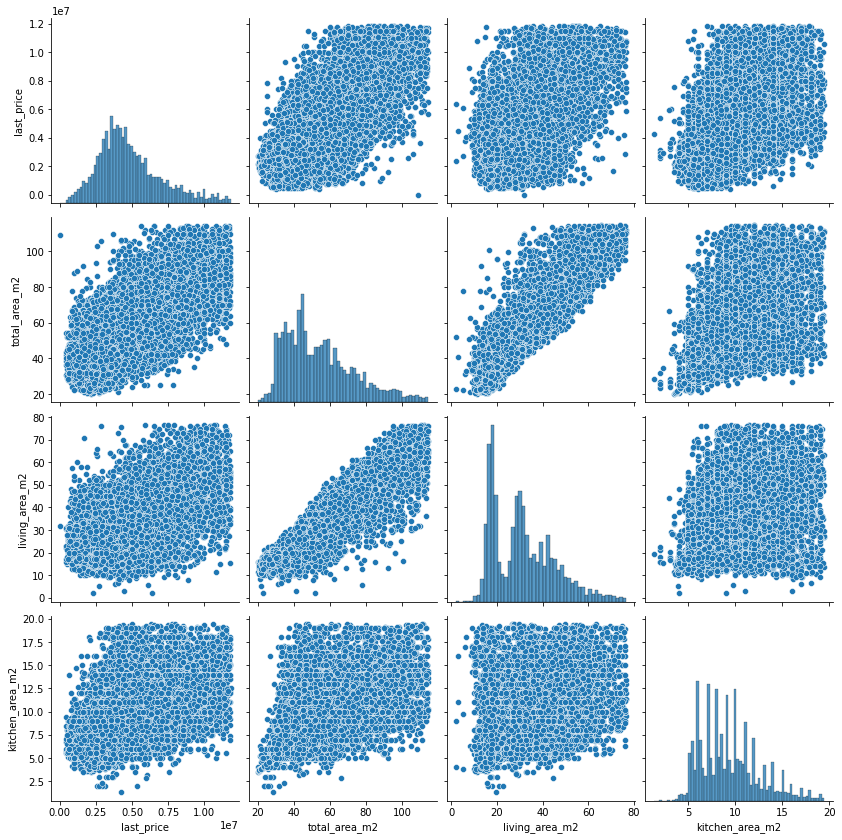

In [192]:
# check
sns.pairplot(data[['last_price', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2']])
plt.gcf().set_size_inches(12,12);


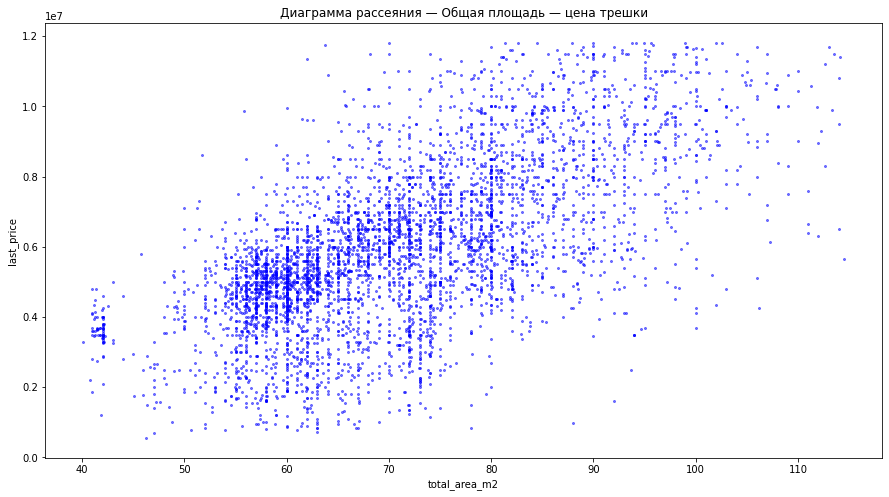

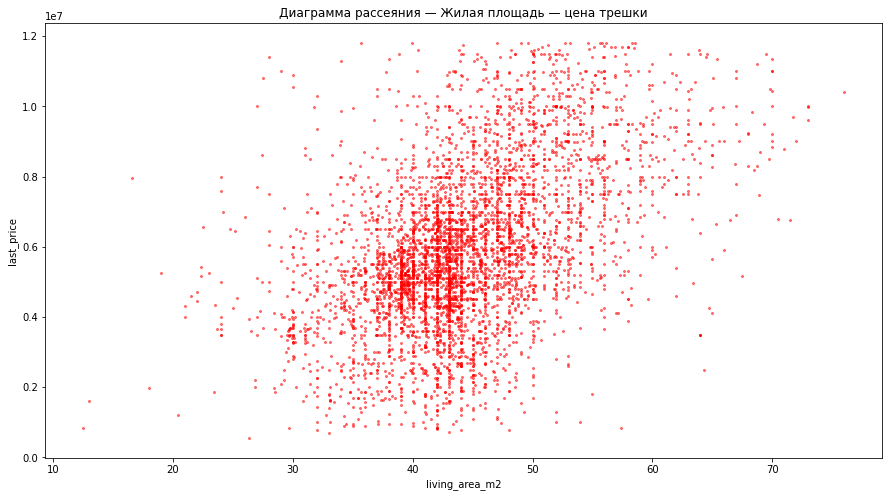

In [193]:
# check
data[data['number_of_rooms'] == 3].query('total_area_m2 < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area_m2', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['number_of_rooms'] == 3].query('total_area_m2 < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area_m2', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

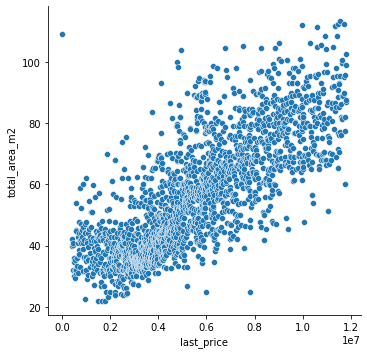

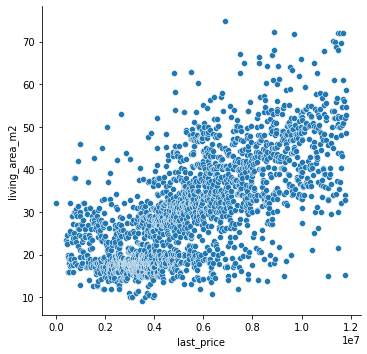

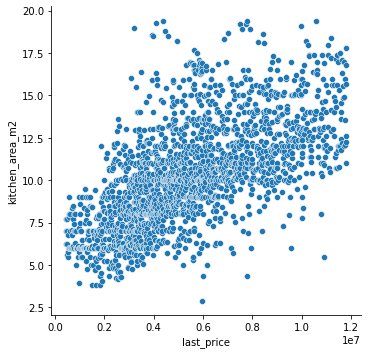

In [194]:
# check
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area_m2', 'living_area_m2', 'kitchen_area_m2']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area_m2', 'living_area_m2', 'kitchen_area_m2']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [X]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод